# i. Perkenalan

---

Program ini bertujuan untuk membuat model klasifikasi menggunakan Machine learning framework Scikit-Learn untuk memprediksi secara akurat kelompok pelanggan (Customer) yang berhenti berlangganan atau tidak lagi membeli produk dari suatu perusahaan. Model ini akan membantu dalam memahami konsep Churn rate, yaitu salah satu indikator apakah bisnis berjalan dengan baik. Churn rate adalah metrik yang menggambarkan jumlah pelanggan yang membatalkan atau tidak memperbarui langganan mereka dengan perusahaan. Jadi, semakin tinggi tingkat churn, semakin banyak pelanggan yang berhenti membeli dari bisnis Anda, yang secara langsung memengaruhi pendapatan dari bisnis yamg akan diterima. Berdasarkan hal ini, membangun model prediktif terkait analisis churn menjadi sumber referensi yang penting bagi keberlangsungan suatu bisnis. 

---

Dataset yang digunakan adalah data yang tersedia pada Website Kaggle, komunitas data Online, bagian dari dataset bernama *Telco Customer Churn* yang didalamnya 
tersedia informasi tentang data transaksi dan profil customer dari suatu perusahaan telekomunikasi berdomisili di Amerika Serikat. Data ini diperoleh dengan lisensi dari website kaggle dengan link sebagai berikut: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?datasetId=13996&sortBy=voteCount

# ii. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import  StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from scipy.stats import reciprocal, uniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import json
import pickle
import warnings
warnings.filterwarnings("ignore")


# iii. Data Loading

In [2]:
# Loading data
data = pd.read_csv('Telco-Customer-Churn.csv')

# Menampilkan 10 baris data teratas
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
# Mengidentfikasi Jumlah data dan tipe data pada setiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<li>Terdapat 7043 baris data dan 21 kolom. Untuk semua tipe data yang teridentifikasi mayoritas adalah data tipe kaegorikal
<li>Pada data 'TotalCharges' memiliki tipe data non-numerik, sehingga perlu dikonversi ke tipe numerik agar dapat dianalisis 

In [4]:
# Mengubah tipe data TotalCharges menjadi numerik
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [5]:
# Mengidentifikasi data berdasarkan nilai unik
data_unique = data.nunique()

print('Jumlah Nilai Unik pada Data:\n ')
print(data_unique)

Jumlah Nilai Unik pada Data:
 
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


<li> Menghapus Kolom yang Tidak Diperlukan:
Kolom customerID perlu dihapus dikarenakan hanyalah sebuah pengidentifikasi dan tidak dapat berguna untuk analisis model klasifikasi.

In [6]:
# Menghapus kolom customerID
data.drop(['customerID'], axis=1, inplace=True)

In [7]:
# Mengidentifikasi kolom numerikal dan kategorik
numerical= data.select_dtypes('number').columns
categorical = data.select_dtypes('object').columns

print(f'Kolom Numerik:  {data[numerical].columns}')
print('\n')
print(f'Kolom Kategorikal: {data[categorical].columns}')

Kolom Numerik:  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


Kolom Kategorikal: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


Pada kolom numerik terdapat kolom 'SeniorCitizen' yang merupakan variabel kategorikal yang sudah ditrasnform menjadi nilai numerik

In [8]:
# Mengecek Cardinality
for feature in data[categorical]:
        print(f'{feature}: {data[feature].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


<li>Terlihat pada beberapa kolom terdapat nilai "No internet service" dan juga terdapat "No phone service". Nilai-nilai ini perlu dihapus supaya informasi yang dihasilkan lebih sinkron dengan data antara "Yes" dan "No", dengan penjelasan bahwa "No" memiliki makna yang sama dengan nilai "No internet service" dan juga terdapat "No phone service".  

In [9]:
# Menghapus dan Menyesuaikan nilai yang tidak sinkron
data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')
data['MultipleLines']= data['MultipleLines'].replace('No phone service','No')
data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [10]:
# Mendeteksi Data Duplikat
duplicate_rows = data[data.duplicated()]
print(f"Jumlah Data Duplikat: {duplicate_rows.shape[0]}")

Jumlah Data Duplikat: 22


Terdapat 22 baris data duplikat, sehingga data ini perlu dihapus untuk menghindari bias dalam analisis. 

In [11]:
# Menghapus Data Duplikat
data.drop_duplicates(inplace=True)

# iv. Exploratory Data Analysis (EDA)

In [12]:
# Menyiapkan data untuk eksplorasi
df=data.copy()

## Statistik Deskriptif

In [13]:
#Mengecek statistik dasar dengan syntax .describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,32.469449,24.534965,0.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.7500,70.400,89.9000,118.75
TotalCharges,7010.0,2290.353388,2266.820832,18.80,408.3125,1403.875,3807.8375,8684.80


Berdasarkan statistik deskriptif, berikut beberapa kesimpulan:
<ul>
<li>tenure: Rata-rata waktu seorang customer telah berlangganan, dalam data ini rata-rata sekitar 32 bulan. Standar deviasi (std) adalah sekitar 24 bulan, yang menunjukkan adanya variasi yang besar pada data ini, diketahui customer dengan waktu terendah (min) adalah 0 bulan (kemungkinan pelanggan baru), sedangkan terlama (max) adalah 72 bulan (6 tahun).
<li>MonthlyCharges: Pelanggan membayar rata-rata tagihan sekitar $64,85 per bulan (mean). Biaya bulanan setiap pelanggan sangat bervariasi, sebagaimana dibuktikan dengan standar deviasi (std) adalah sebesar $30.
<li>TotalCharges: Merupakan total tagihan yang diberikan kepada pelanggan selama periode data ini. Rata-rata seorang customer telah ditagih totalnya sekitar $2290 (mean). Standar deviasi (std) sekitar $2.266, menunjukkan variasi yang cukup besar antar tagihan satu customer ke customer lainnya, dibuktikan juga dengan range yang cukup jauh dari nilai tagihan minimum (min) sebesar $18, sedangkan maksimum (max) adalah $8,684.</ul>     

Singkatnya, pada data ini sebagian besar memiliki masa langganan yag bervariasi, sehingga jumlah tagihan-tagihannya antar customer juga sangat heterogen.

In [14]:
# Mendfefinisikan fungsi untuk membuat boxplot dan histogram dari setiap feature numeric

def diagnostic_plots(df, variable):
    # Mendefinisikan figure size
    plt.figure(figsize=(16, 3))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram '+ variable )
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot ' + variable)
    plt.show()

    #Cek skew feature
    print('\nNilai Skewness ',variable, ' : ' , df[variable].skew())

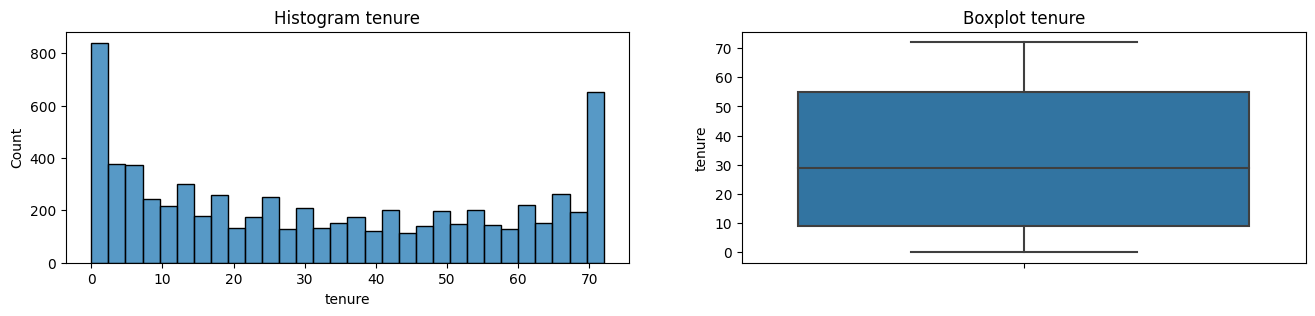


Nilai Skewness  tenure  :  0.23554168006988707


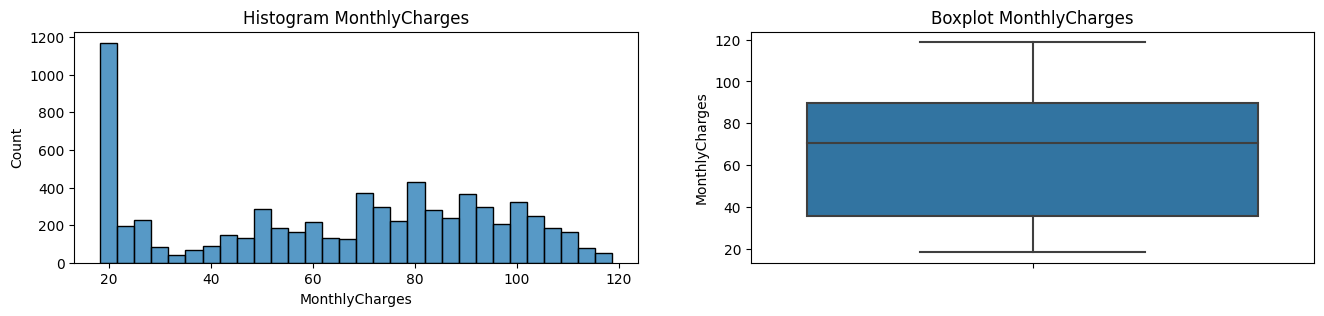


Nilai Skewness  MonthlyCharges  :  -0.22409728909692606


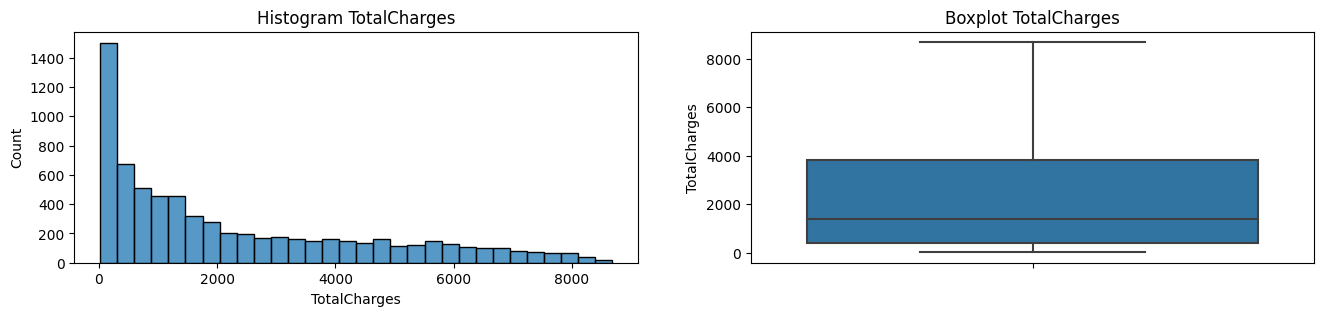


Nilai Skewness  TotalCharges  :  0.9583220586626408


In [15]:
# Mengelompokkan kolom numerik
numerical_cols = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Membuat List Nama Kolom
list_columns = numerical_cols.columns.to_list()

# Pengecekkan outlier setiap feature numeric
for i in list_columns:
    diagnostic_plots(df, i)

Berdasarkan grafik distribusi diatas: 
<li>Data "tenure" memiliki distribusi yang sedikit memiliki kemiringan ke kanan, yang berarti terdapat lebih banyak customer yang memiliki tenor lebih pendek dibandingkan customer yang memiliki tenor lebih panjang.

<li>"Monthly Charges" terkait distribusi datanya menunjukkan sedikit kemiringan ke kiri, yang menunjukkan bahwa terdapat sedikit lebih banyak customer dengan biaya bulanan yang lebih tinggi dibandingkan dengan customer dengan biaya lebih rendah.
<li>"TotalCharges" menunjukkan kemiringan atau skewness positif yang cukup kuat/ Hal ini berarti lebih banyak customer yang memiliki tagihan di bawah rata-rata, dan lebih sedikit customer yang memiliki total tagihan yang sangat tinggi.

## Analisis "Churn Rate"

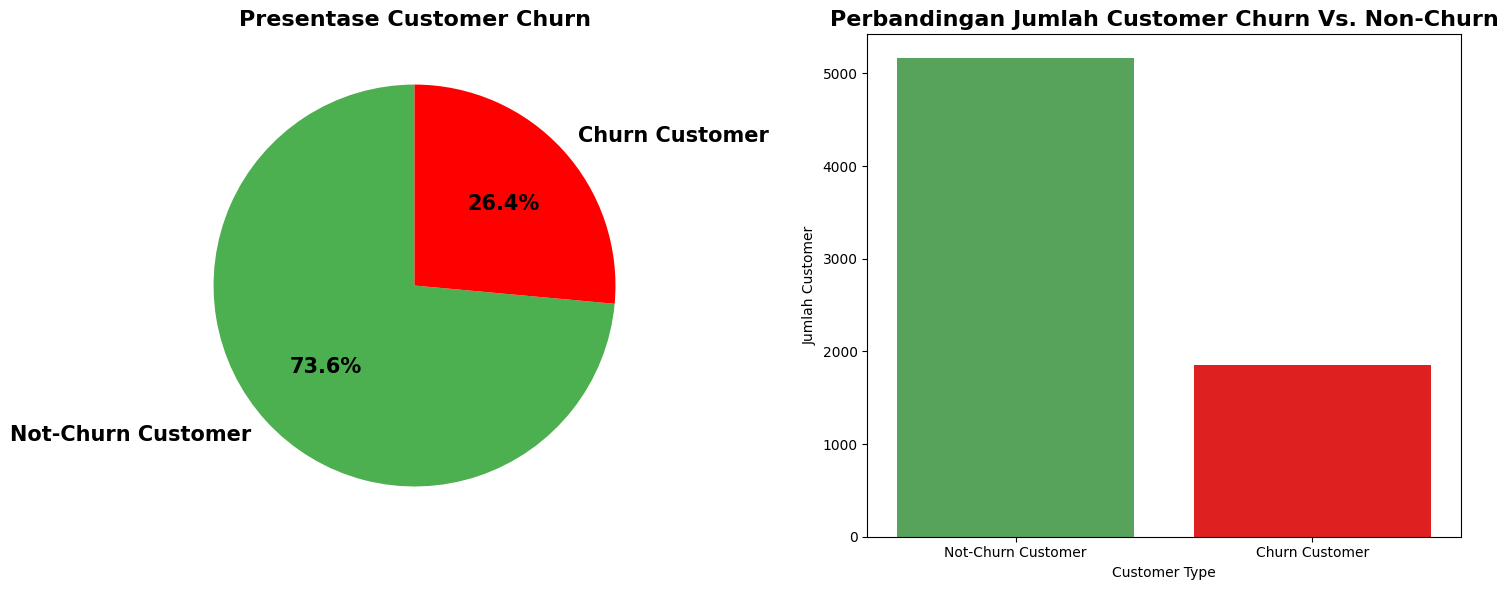

In [16]:
# Menampilkan Visualisasi Presentase Churn

# Menghitung Total Variabel Churn
churn_counts = df['Churn'].value_counts()

# Memberi nama Kategori Churn
churn_counts.index = ['Not-Churn Customer' if x == 'No' else 'Churn Customer' for x in churn_counts.index]

# Visualisasi 2 plot - 2kolom
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Visualisasi Pie Chart
text_properties = {'fontsize': 15, 'fontweight':'bold'} 
axes[0].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', 'r'], textprops=text_properties)
axes[0].set_title("Presentase Customer Churn", fontweight='bold', fontsize=16)

# Visualisasi Bar Chart
sns.countplot(data=df, x='Churn', ax=axes[1], palette=['#4CAF50', 'r'])

# Menenatpkan Label dan Judul Pada Chart
axes[1].set_title("Perbandingan Jumlah Customer Churn Vs. Non-Churn", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Customer Type")
axes[1].set_ylabel("Jumlah Customer")
axes[1].set_xticklabels(['Not-Churn Customer', 'Churn Customer'])

plt.tight_layout()
plt.show()


<li>Terlihat mayoritas pada data ini adalah customer yang berstatus Non-churn, sehingga dalam konteks analisis ini, variabel target yang akan diprediksi tergolong tidak seimbang (imbalanced data).
<li>Sekitar 26% customer dari data ini merupakan Churn Customers atau memilih untuk berhenti menjadi pelanggan, sehingga perusahaan kehilangan seperempat dari pendapatannya yang diperoleh dari customer tersebut.
<li>Dilihat dari jumlahnya, sekitar 1800 customer yang churn. Sedangkan jika dievaluasi dari presentase-nya, angka 26% termasuk kategori tinggi, yang mengindikasikan adanya cukup banyak pelanggan yang merasa tidak puas dengan produk atau layanan yang disediakan perusahaan saat ini. 

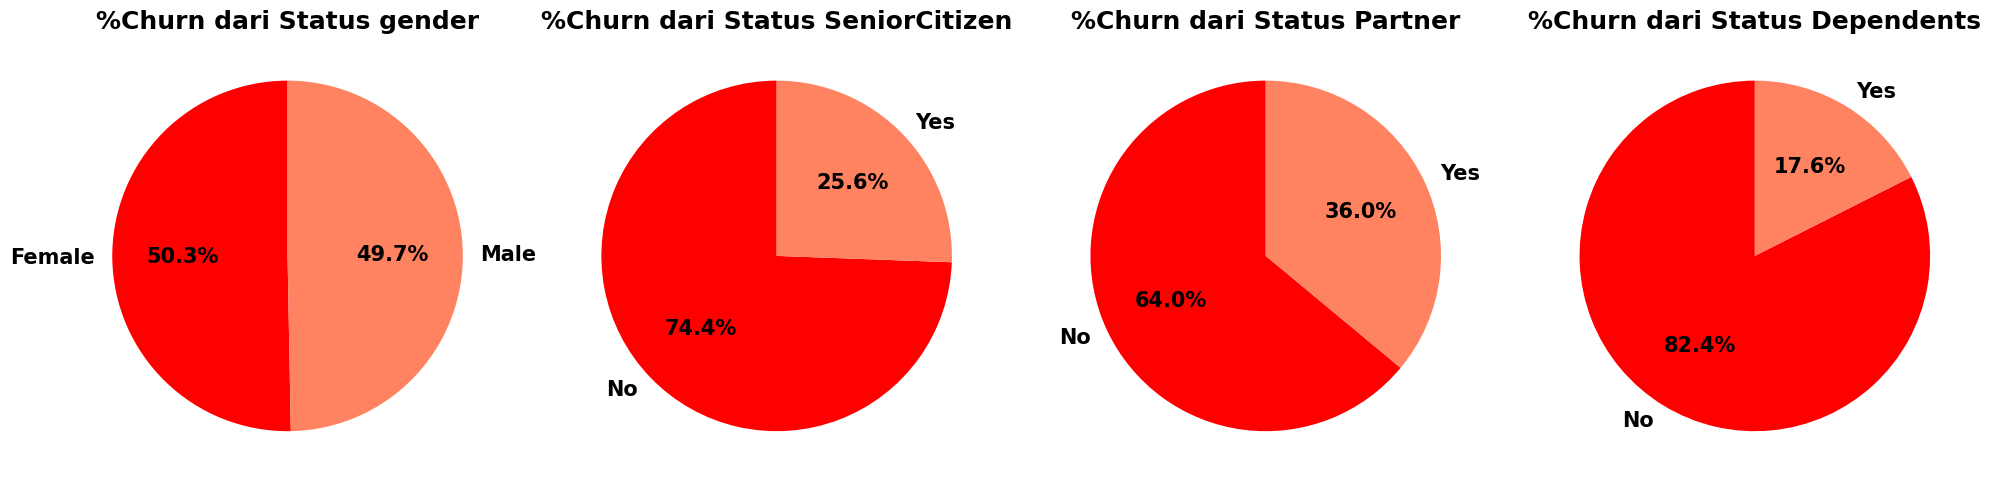

In [17]:
# Visualisasi Perbandingan Churn dengan Profil Customer

text_properties = {'fontsize': 15, 'fontweight':'bold'} 
colors_palette = ['#FF0000', '#FF8361']
def plot_pie_for_column(column_name, ax, labels_map=None):
    # Untuk menghitung porsi masing-masing kolom terhadap jumlah Churn
    grouped = df.groupby([column_name, 'Churn']).size().unstack().fillna(0)

    # Plot perbandingan Pie Chart kategori Churn vs Non Churn
    ax.pie(grouped['Yes'], labels=grouped.index, autopct='%1.1f%%', startangle=90, colors=colors_palette[:len(grouped)], textprops=text_properties)
    ax.set_title(f"%Churn dari Status {column_name}", fontweight='bold', fontsize=18)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Pie Charts
plot_pie_for_column('gender', axes[0])
plot_pie_for_column('SeniorCitizen', axes[1])
plot_pie_for_column('Partner', axes[2])
plot_pie_for_column('Dependents', axes[3])

plt.tight_layout()
plt.show()


<li>Dilihat perbandingan berdasarkan gender, antara Customer/pelanggan pria dan wanita hampir sama atau sebanding terkait jumlah customer yang berhenti menjadi pelanggan perusahaan. 
<li>Mayoritas customer adalah pelanggan yang tergolong usia muda yang berhenti menjadi pelanggam. Hanya sekitar 25% dari seluruh pelanggan yang tergolong lanjut usia yang memutuskan untuk berhenti menjadi pelanggan, namun angka ini juga menunjukkan chrurn rate yang cukup tinggi pada customer lanjut usia. 
<li>Berdasarkan status Partner, terlihat lebih banyak pelanggan yang berstatus belum menikah yang memilih untuk berhenti menjadi pelanggan, sedangkan 36% dari customer yang memutuskan untuk berhenti menjadi pelanggan adalah customer yang sudah menikah. 
<li>Jika dilihat dari jumlah tanggungannya (Dependents), hanya sekitar 17% dari total customer yang meninggalkan perusahaan adalah pelanggan yang memiliki tanggungan atau anak, sedangkan mayoritas pelanggan yang keluar adalah yang belum memiliki tanggungan sama sekali.

## Analisis "Churn Rate" Berdasarkan Lini Produk dan Layanan Perusahaan

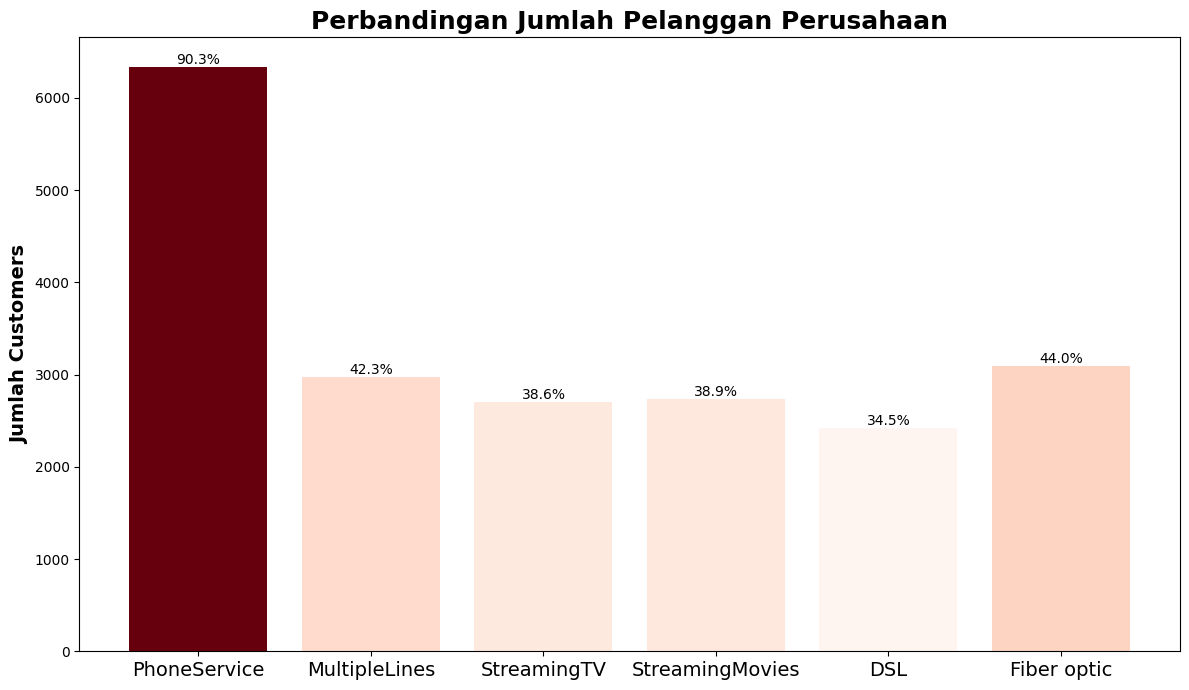

In [18]:
# Visualisasi Perbandingan Jumlah Pelanggan Perusahaan
yes_counts = df[['PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']].apply(lambda x: x.value_counts().get('Yes', 0))
internet_counts = df['InternetService'].value_counts().reindex(['DSL', 'Fiber optic']).fillna(0)
final_counts = pd.concat([yes_counts, internet_counts])

# Menghitung Presentase Jumlah Pelanggan
total_customers = len(df)
percentages = (final_counts / total_customers) * 100

# Setting Warna bar
norm = plt.Normalize(final_counts.min(), final_counts.max())
colors = plt.cm.Reds(norm(final_counts.values))  

# Visualisasi
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(final_counts.index, final_counts.values, color=colors)

# Menambah Label Presentase di setiap bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, '{:.1f}%'.format((yval/total_customers)*100), ha='center', va='bottom')

ax.set_ylabel('Jumlah Customers', fontweight='bold', fontsize=14)
ax.set_title('Perbandingan Jumlah Pelanggan Perusahaan', fontsize=18, fontweight='bold')
ax.tick_params(axis='x', labelsize=14)
plt.tight_layout()
plt.show()


<li> Dapat diidentifikasi bawha perusahaan memiliki layanan jasa penyedia telekomunikasi Telepon, layanan Streaming, dan layanan penyediaan internet. 
<li> Mayoritas pelanggan perusahaan adalah pengguna layanan PhoneService, atau bisa dikatakan hampir semua pelanggan menggunakan layanan telepon.
<li> Pada layanan internet, "Fiber Optic" merupakan layanan yang lebih banyak dipilih dibandingkan dengan "DSL".
<li> Terkait layanan Streaming, pelanggan memiliki preferensi yang sama untuk kedua produk streaming.    

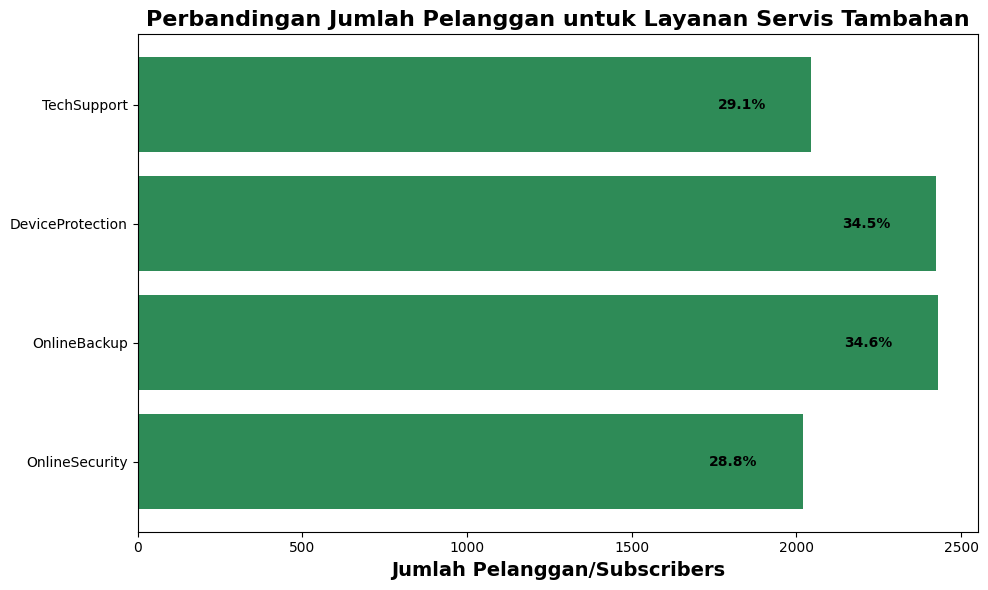

In [19]:
# Membuat Visialisasi Perbandingan Jumlah Customers Berdasarkan Segmen "Additional Product" 

# Menghitung Jumlah Pelanggan
comp_service = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']]
yes_counts = comp_service.apply(lambda x: x.value_counts().get('Yes', 0))

# Kalkulasi Presentase
total_customers = len(df)
percentages = (yes_counts / total_customers) * 100

# Visualisasi
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(yes_counts.index, yes_counts.values, color='seagreen')

# Menambahkan Label Presentase%
for bar in bars:
    width = bar.get_width()
    ax.text(width - (0.03 * total_customers), 
            bar.get_y() + bar.get_height()/2, 
            '{:.1f}%'.format((width/total_customers)*100), 
            ha='center', va='center', color='black', fontweight='bold')

ax.set_xlabel('Jumlah Pelanggan/Subscribers', fontsize=14, fontweight='bold')
ax.set_title('Perbandingan Jumlah Pelanggan untuk Layanan Servis Tambahan', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()


<li> Data diatas menampilkan layanan tambahan yang disediakan oleh perusahaan apabila pelanggan berminat upgrade dari layanan utama.
<li> Online Backup dan Device Protection merupakan layanan tambahan yang lebih banyak dipilih oleh pelanggan.

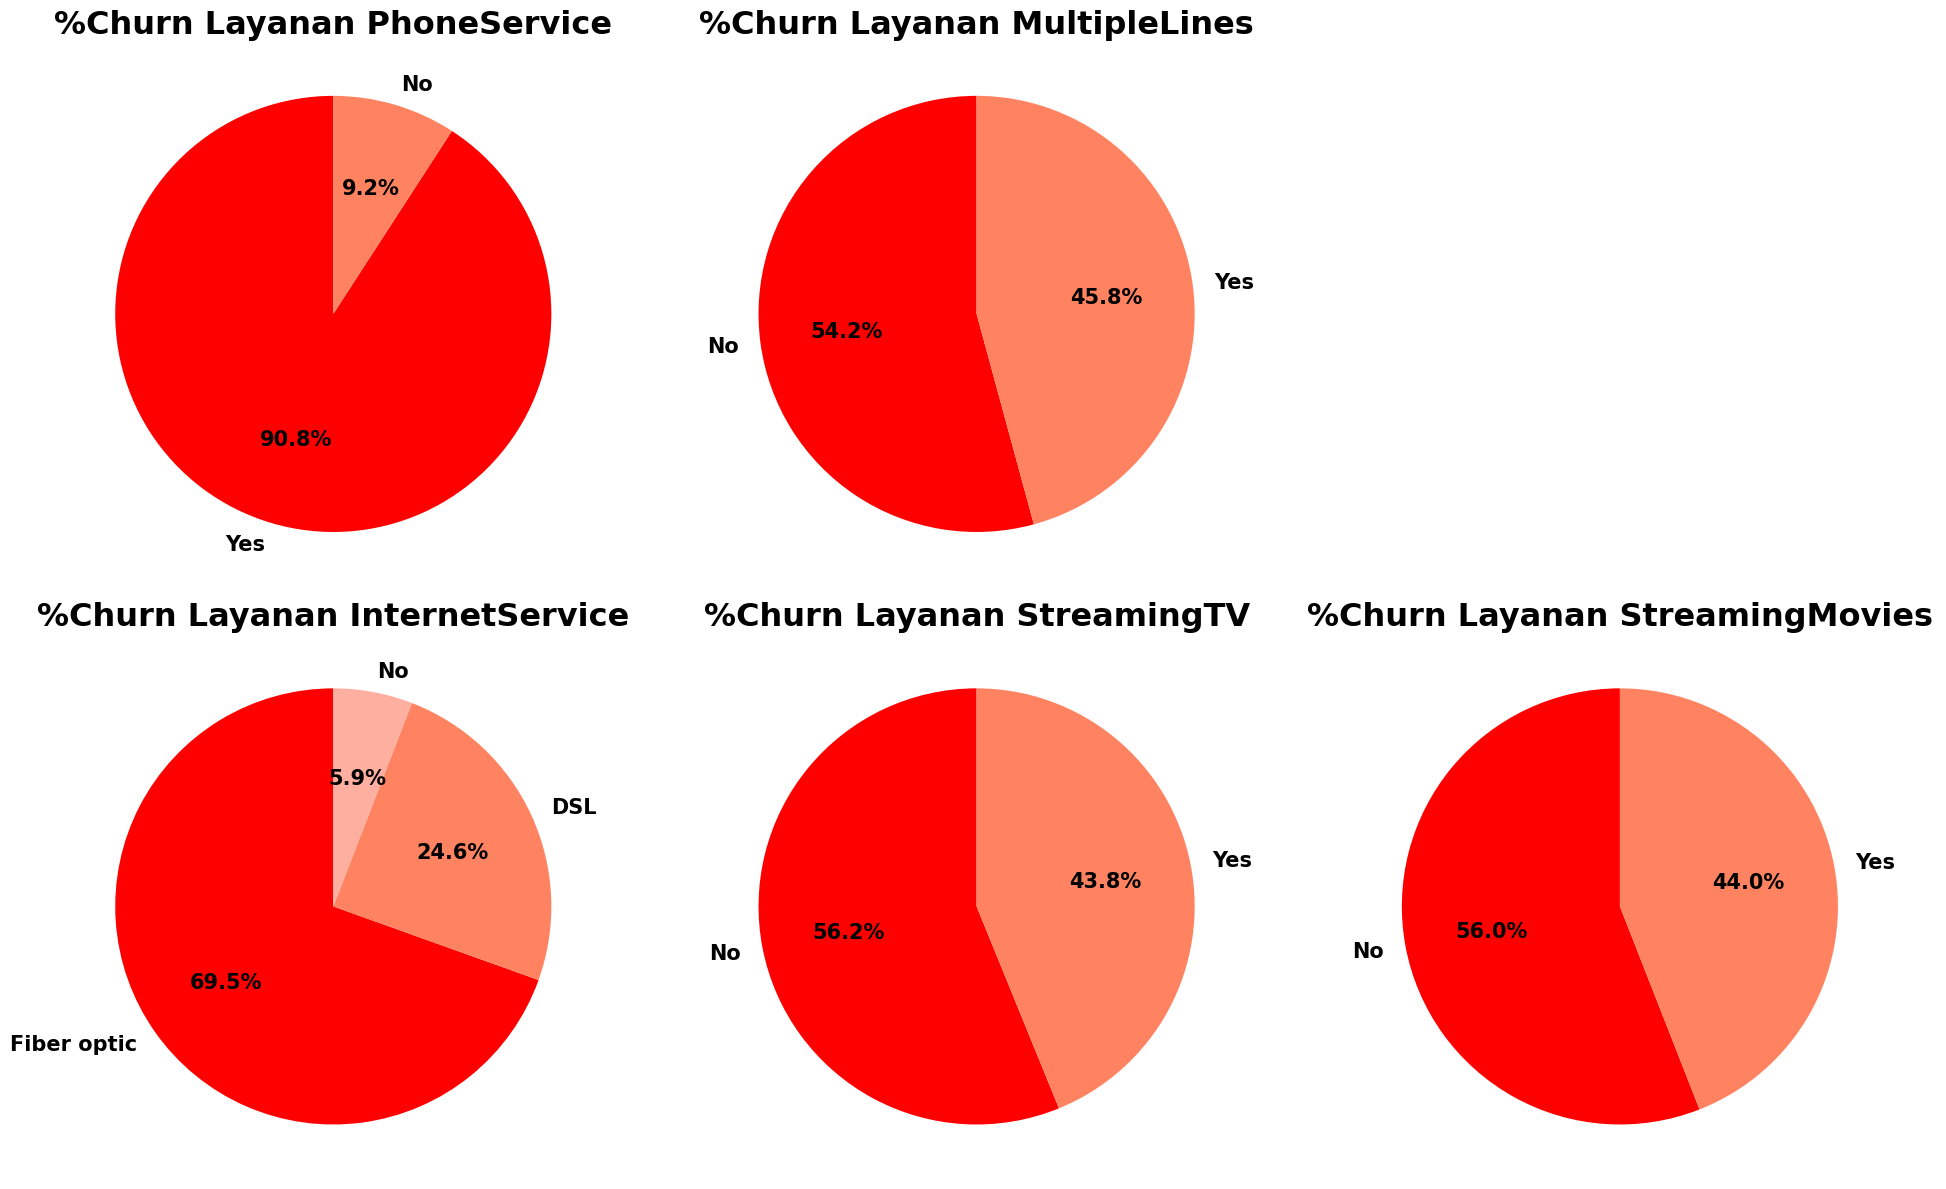

In [20]:
# Visualisasi Pie Chart Untuk Perbandingan Churn Berdasarkan Segmen Produk 

colors = ['#FF0000','#FF8361', '#FFAF9F']  # Menetapkan Warna Pie Chart
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

def plot_pie_for_column(column_name, ax):
    grouped = df.groupby([column_name, 'Churn']).size().unstack().fillna(0)

# Menerapkan Posisi Index Visual
    if column_name == 'PhoneService':
        grouped = grouped.reindex(['Yes', 'No'])
    if column_name == 'InternetService':
        grouped = grouped.reindex(['Fiber optic', 'DSL', 'No'])

    # Membuat colormap
    norm = mpl.colors.Normalize(vmin=0, vmax=grouped['Yes'].sum())
    pie_colors = [cmap(norm(value)) for value in grouped['Yes']]
    
    ax.pie(grouped['Yes'], labels=grouped.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops=text_properties)
    ax.set_title(f"%Churn Layanan {column_name}", fontsize=23, fontweight='bold')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Visualisasi Pie Chart
plot_pie_for_column('PhoneService', axes[0][0])
plot_pie_for_column('MultipleLines', axes[0][1])
axes[0][2].axis('off')
plot_pie_for_column('InternetService', axes[1][0])
plot_pie_for_column('StreamingTV', axes[1][1])
plot_pie_for_column('StreamingMovies', axes[1][2])

plt.tight_layout()
plt.show()


<li>Dari total customer yang berhenti menggunakan layanan perusahaan, hanya sekitar 9% yang bukan pelanggan Phone Service, sedangkan mmayoritas 90% merupakan customer yang subscribe atau berlanggananan PhoneService. Dalam hal ini, mayoritas pelanggan ada kecenderungan yang cukup besar merasa tidak puas terhadap layanan ini.
<li>Sekitar 45% dari pelanggan yang berhenti merupakan pelanggan yang memiliki layanan MultipleLines atau layanan telepon dengan jaringan lebih dari satu.
<li>Berdasarkan produk layanan internet, hampir 70% customer yang meninggalkan perusahaan adalah pelanggan yang subscribe layanan Fiber optic. Sedangkan untuk layanan internet DSL, hanya sekitar 24% pelanggan yang meninggalkan perushaan bersumber dari layanan ini.
<li>Kira-kira 40% dari total keseluruhan pelanggan yang unsubscribe merupakan pelanggan yang sebelumnya subscribe terhadap layanan Streaming TV dan Movies. 

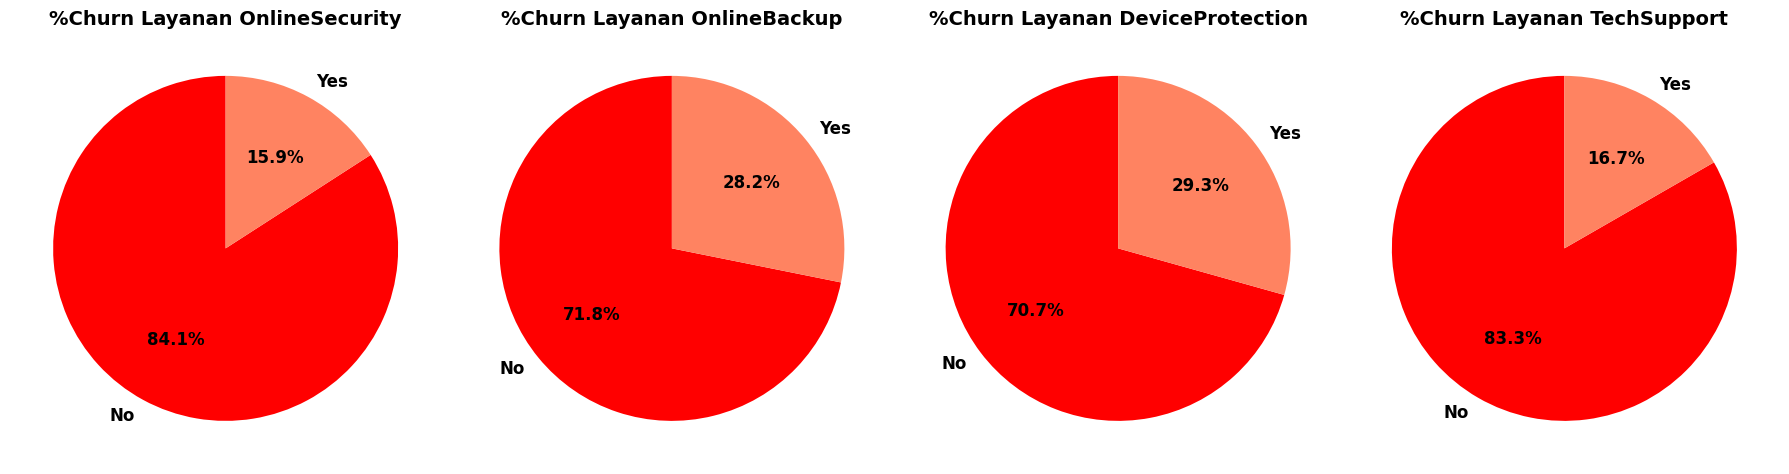

In [21]:
# Visualisasi Perbandingan Churn Berdasarkan Segmen Layanan Jasa
pie_colors = ['#FF0000', '#FF8361']
text_properties = {'fontsize': 12, 'fontweight':'bold'}
def plot_pie_for_column(column_name, ax):
    grouped = df.groupby([column_name, 'Churn']).size().unstack().fillna(0)
    
    ax.pie(grouped['Yes'], labels=grouped.index, autopct='%1.1f%%', startangle=90, colors=pie_colors, textprops=text_properties)
    ax.set_title(f"%Churn Layanan {column_name}", fontsize=14, fontweight='bold')

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))

# Visualisasi Pie Chart
plot_pie_for_column('OnlineSecurity', axes[0])
plot_pie_for_column('OnlineBackup', axes[1])
plot_pie_for_column('DeviceProtection', axes[2])
plot_pie_for_column('TechSupport', axes[3])

plt.tight_layout()
plt.show()

<li>Hanya sekitar 15% dari customer yang memutuskan berhenti adalah customer yang sebelumnya pengguna layanan Online Security dan Layanan TechSupport. Hal ini menunjukkan adanya kecenderungan pelanggan merasa puas dalam pelayanan ini dibandingkan dengan pelayanan produk lainnya.
<li>Berdasarkan layanan Online Backup dan Device Protection, kira-kira sekitar 28-29% customer yang berhenti langganan berasal dari layanan ini. 

## Analisis "Churn Rate" Berdasarkan Jenis Paket/Kontrak dan Mekanisme Pembayaran

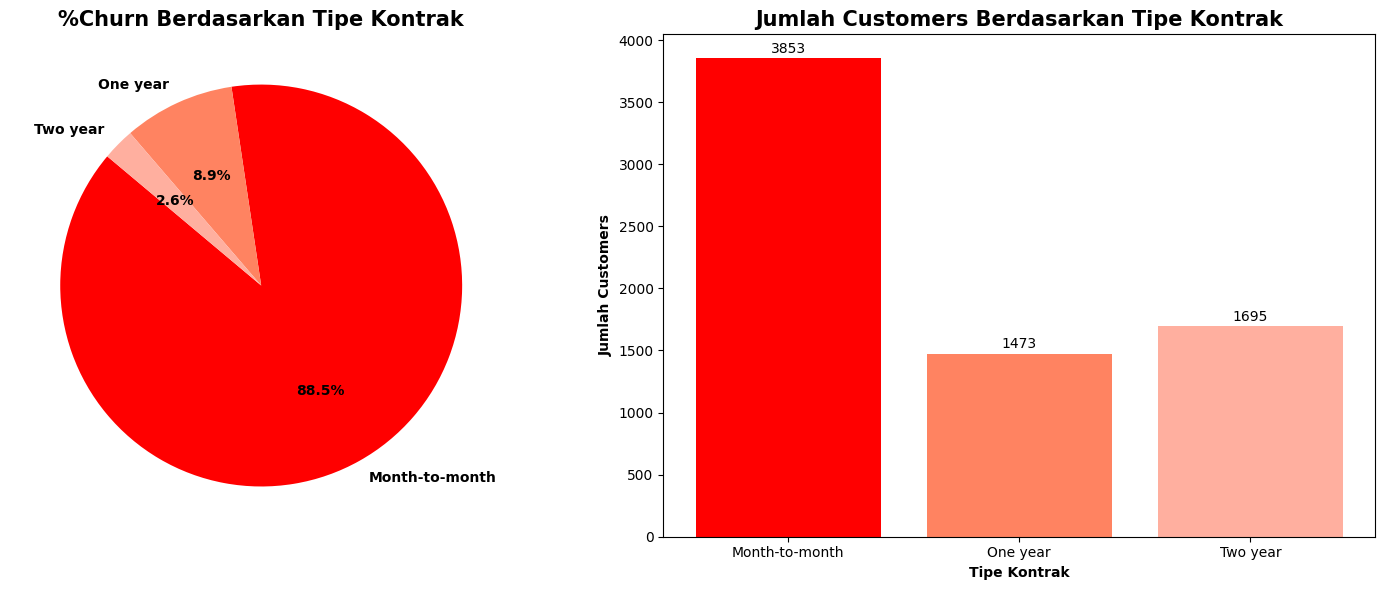

In [22]:
# Visualisasi Perbandingan Customer Berdasarkan Tipe Kontrak
text_properties = {'fontsize': 10, 'fontweight':'bold'}
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Pie chart
grouped = df[df['Churn'] == 'Yes']['Contract'].value_counts()
colors = ['#FF0000','#FF8361', '#FFAF9F']
labels = grouped.index
axes[0].pie(grouped, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops=text_properties)
axes[0].set_title("%Churn Berdasarkan Tipe Kontrak", fontsize=15, fontweight='bold')

# Bar chart
contract_counts = df['Contract'].value_counts().sort_index()
bars = axes[1].bar(contract_counts.index, contract_counts, color=colors)
axes[1].set_title("Jumlah Customers Berdasarkan Tipe Kontrak", fontsize=15, fontweight='bold')
axes[1].set_ylabel("Jumlah Customers", fontweight='bold')
axes[1].set_xlabel("Tipe Kontrak", fontweight='bold')

# Menambahkan Label angka pada Bar Chart
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 20, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

<li>Sebagian besar customer menggunakan layanan perusahaan dengan jangka waktu paket atau kontrak layanan bulanan. Sebagian lainnya adalah anatara customer yang menggunakan paket annual per tahuan atau paket kontrak 2 tahun. 
<li>Terlihat bahwa mayoritas customer yang memilih untuk berhenti berlangganan paling banyak adalah customer yang memiliki paket bulanan, sehingga ada kecenderungan yang kuat pelanggan yang merasa paling tidak puas adalah pelanggan yang memiliki kontrak jangka pendek dengan perusahaan. 

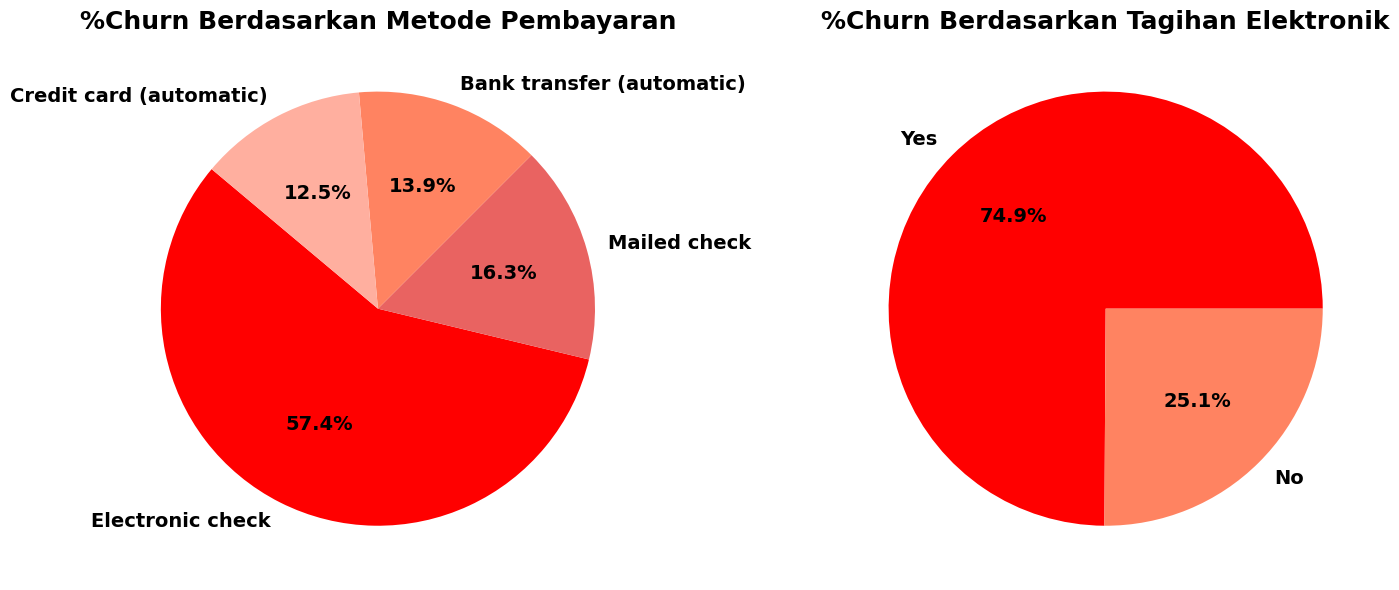

In [23]:
# Visualisasi Perbandingan Customer Berdasarkan Metode Pembayaran
text_properties = {'fontsize': 14, 'fontweight':'bold'}
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Pie Chart Perbandingan Jumlah Customer Churn Berdasarkan Metode Pembayaran
payment_grouped = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()
colors_payment = ['#FF0000','#E96361','#FF8361', '#FFAF9F']
labels_payment = payment_grouped.index
axes[0].pie(payment_grouped, labels=labels_payment, autopct='%1.1f%%', colors=colors_payment, startangle=140, textprops=text_properties)
axes[0].set_title("%Churn Berdasarkan Metode Pembayaran", fontsize=18, fontweight='bold')

# Pie chart Perbandingan Churn Berdasarkan Jenis Tagihan
billing_grouped = df[df['Churn'] == 'Yes']['PaperlessBilling'].value_counts()
colors_billing = ['#FF0000','#FF8361']
labels_billing = billing_grouped.index
axes[1].pie(billing_grouped, labels=labels_billing, autopct='%1.1f%%', colors=colors_billing, textprops=text_properties)
axes[1].set_title("%Churn Berdasarkan Tagihan Elektronik", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

<li> Mayoritas pelanggan yang tidak lanjut menggunakan produk perusahaan merupakan pelanggan yang membayar dengan cek elektronik. Terkait dengan hal ini, perlu dianalisis lebih lanjut apakah ada keterkaitan antara metode pembayaran dengan potensi churn atau pelanggan yang cancel subscription.
<li> Presentase Churn yang tinggi pada tagihan elektornik juga perlu dievaluasi apakah ada keterkaitan antara tagihan elektronik yang terlambat atau tidak akurat terkait tagihan yang diterbitkan melalui elektronik 

## Analisis "Churn Rate" Berdasarkan Periode Penggunaan Layanan

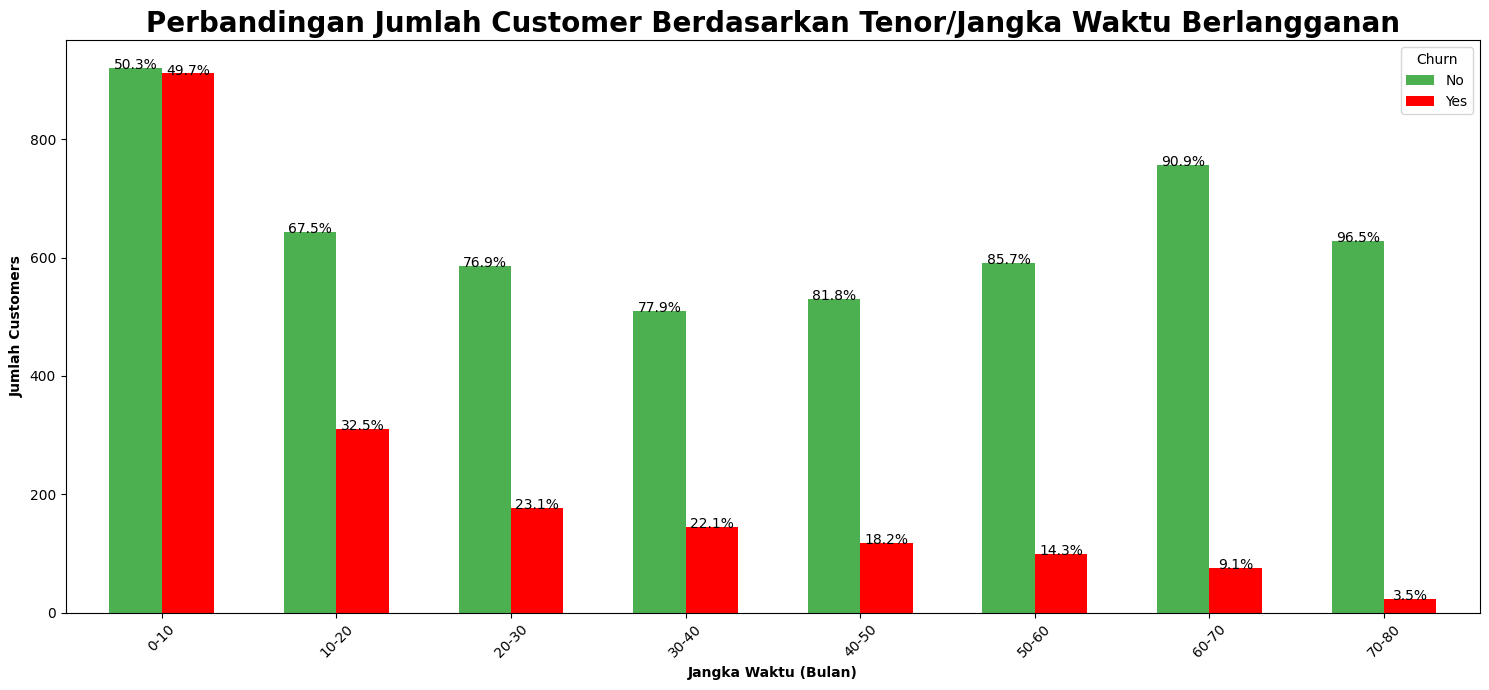

In [24]:
# Membuat Visualisasi Customer Churn Berdasarkan Jangka Waktu Langganan

# Membuat Data Segmen Tenor Berdasarkan kisaran bulan
bins = list(range(0, 81, 10)) 
labels = ['{}-{}'.format(i, i+10) for i in range(0, 71, 10)]
df['tenure_range'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
colors = ['#4CAF50', 'r']
# Mengelompokkan Customer Berdasarakn Segmen Waktu Langganan 
grouped = df.groupby(['tenure_range', 'Churn']).size().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(15, 7))

grouped.plot(kind='bar', stacked=False, ax=ax, width=0.6, color=colors)

# Membuat Label Presentase
bar_width = 0.3
for i, (label, row) in enumerate(grouped.iterrows()):
    total = row.sum()
    for j, val in enumerate(row):
        percentage = f"{val / total * 100:.1f}%"
        x_pos = i - bar_width / 2 + j * bar_width
        y_pos = val + 5 
        ax.text(x_pos, y_pos, percentage, ha='center', va='center', rotation=0)

ax.set_title('Perbandingan Jumlah Customer Berdasarkan Tenor/Jangka Waktu Berlangganan', fontweight='bold', fontsize=20)
ax.set_xlabel('Jangka Waktu (Bulan)', fontweight='bold')
ax.set_ylabel('Jumlah Customers', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<li> Dapat teridentifikasi bahwa paling banyak jumlah pelanggan yang memutuskan cancel subscription adalah pada periode awal, yaitu antara 0 sampai 10 bulan atau bisa dikatakan pelanggan yang relatif baru.
<li> Terlihat pola semakin lama pelanggan sudah berlangganan, semakin kecil tingkat "Churn Rate", yang dapat diinterpretasikan bahwa semakin lama pelanggan telah menggunakan layanan perusahaan, maka tingkat loyalitasnya semakin tinggi sehingga probabilitas berpindah layanan atau berhenti menjadi pelanggan semakin minim.
<li> Dari visualisasi diatas, perusahaan ada kecenderungan lebih memprioritaskan pelanggan-pelanggan yang existing dibandingkan dengan nasabah yang baru, yang mungkin terkait dengan customer loyalty program yang baik dan lebih diprioritaskan untuk pelanggan-pelanggan yang setia sejak lama. 

In [25]:
# Mengelompokkan Kolom Visualisasi
l1 = ['gender','SeniorCitizen','Partner','Dependents']  # Informasi Profil Customers
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']  # Informasi Layanan
l3 = ['Contract','PaperlessBilling','PaymentMethod']    # Informasi Metode Pembayaran

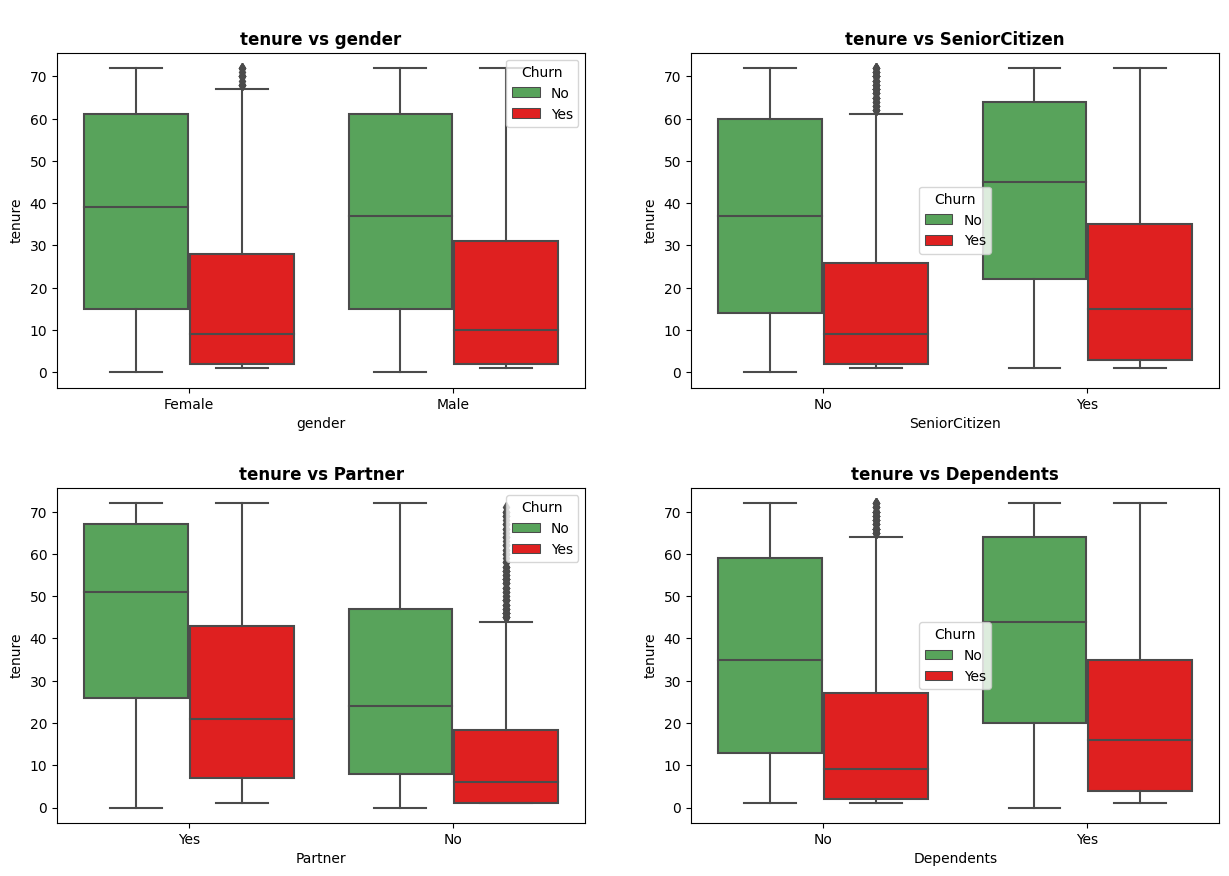

In [26]:
# Visualisasi Perbandingan Customer Churn Berdasarkan Tenor dan Profil Customers
fig = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i], y = 'tenure', data = df,hue = 'Churn', palette = colors);
    plt.subplots_adjust(hspace=0.3)
    plt.title('\ntenure vs ' + l1[i], fontweight='bold');

<li> Berdasarkan gender, baik pelanggan laki-laki atau peremupan memiliki kecenderungan pola yang sama, dimana lebih banyak pelanggan yang memutuskan berhenti berlangganan pada periode kisaran 0 sampai 25 bulan.
<li> Jika dilihat secara perbandingan umur, terlihat pelanggan dengan lanjut usia cenderung memiliki rentang waktu yang lebih lama untuk memutuskan berhenti berlangganan, sehingga bisa dikatakan layanan perusahaan lebih diterima dikalangan usia yang lebih tua.
<li> Berdasarkan status berkeluarga atau berpasangan, dapat dilihat ada kecenderungan layanan perusahaan lebih diminati oleh kalangan pelanggan yang sudah berkeluarga dan memiliki pasangan dibandingkan dengan kalangan yang belum menikah dan belum memiliki tanggungan.

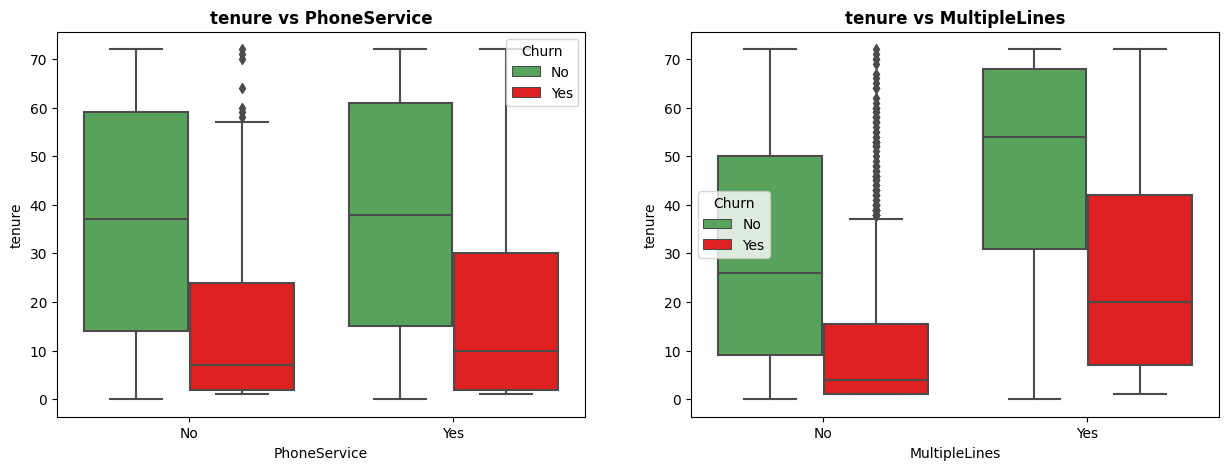

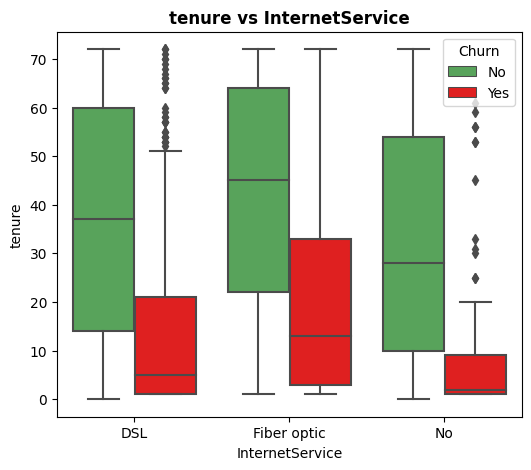

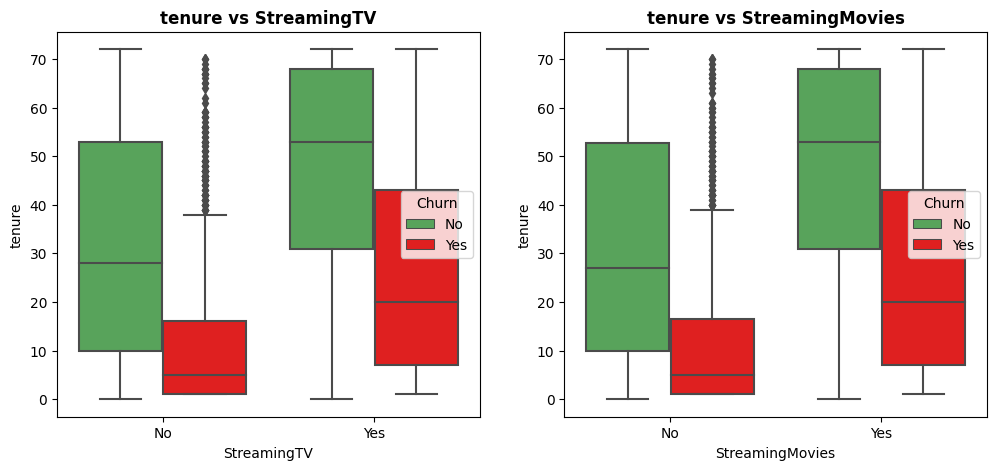

In [27]:
# Visualisasi Perbandingan Customer Churn Berdasarkan Tenor dan Lini Produk

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i], y = 'tenure', data = df, hue = 'Churn', palette = colors);
    plt.title('tenure vs ' + l2[i], fontweight='bold');

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2], y = 'tenure', data = df, hue = 'Churn', palette = colors);
plt.title('tenure vs ' + l2[2], fontweight='bold', fontsize=12);
    
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3], y = 'tenure', data = df, hue = 'Churn', palette = colors);
    plt.title('tenure vs ' + l2[i + 3], fontweight='bold');

<li> Pada layanan penyadiaan telepon, terlihat untuk tipe layanan "Phone Service" rata-rata pelanggan memutuskan untuk berhenti menjadi pelanggan adalah pada kisaran 0 sampai 25 bulan, sedangkan pada layanan "Multiple Lines" rata-rata pelanggan memutuksan untuk berhenti adalah kisaran 5 sampai 40 bulan. Sehingga ada kecenderungan "Multiple Lines" lebih banyak diminati.
<li> Layanan Internet "Fiber optic" terlihat lebih banyak pelanggan yang memilih lebih lama untuk berlangganan dibandingan dengan "DSL", dimana rata-rata pelanggan DSL memilih berhenti berlangganan pada kisaran 0 sampai 20 bulan, namun tetap identik dimana nasabah lebih banyak memutuskan berhenti berlanggan diawal-awal periode langganannya.
<li> Layanan Streaming, baik TV maupin Movies memiliki pola yang hampir mirip satu sama lain, diamana pelanggan memiliki rata-rata berhenti berlangganan pada rentang waktu 5 sampai 40 bulan. Dibandingkan semua lini produk, layanan Streaming terlihat lebih banyak pelanggan loyal dibandingkan dengan pelanggan layanan lainnya jika dilihat dari segi rata-rata pelanggan berhenti berlangganan.

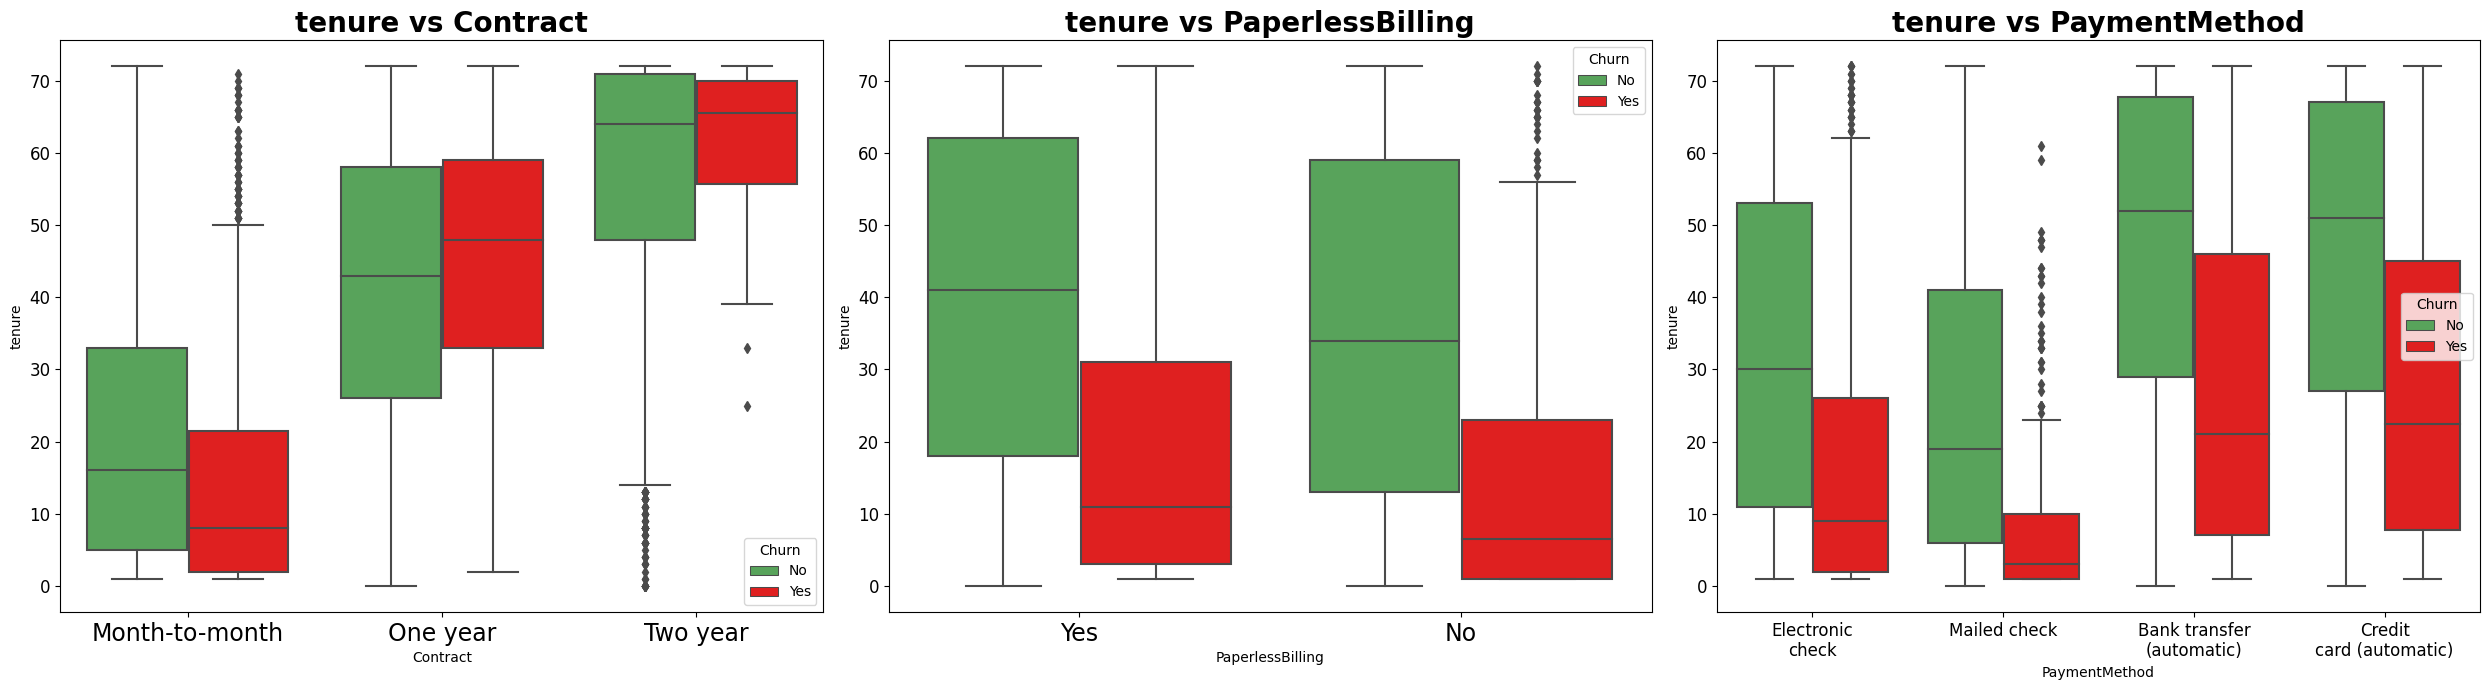

In [28]:
# Visualisasi Perbandingan Tenor, Tipe Kontrak Layanan Customers, dan Tipe Pembayaran
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

for i in range(len(l3)):
    plt.subplot(1, 3, i + 1)
    ax = sns.boxplot(x=l3[i], y='tenure', data=df, hue='Churn', palette=colors)
    plt.title('tenure vs ' + l3[i], fontweight='bold', fontsize=20)
    
    ax.tick_params(axis='x', labelsize=17)  
    ax.tick_params(axis='y', labelsize=12)  
    
    def split_label(label):
        if len(label) <= 15:
            return label
        mid = len(label) // 2  
    # Menerapkan 2 baris pada label x axis
        split_point = mid + label[mid:].find(' ') 
        if split_point == mid: 
            split_point = label.rfind(' ', 0, mid)
        if split_point == -1: 
            return label[:mid] + '\n' + label[mid:]
        return label[:split_point] + '\n' + label[split_point+1:]

labels = [split_label(label.get_text()) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels, fontsize=12)
plt.tight_layout()
plt.show()

<li> Terlihat berdasarkan tipe kontrak, pelanggan dengan tipe kontrak bulanan memiliki rata-rata memilih untuk berhenti berlangganan pada kisaran 1 sampai 20 bulan, sedangkan tipe kontrak yang lebih lama, seperti kontrak tahunan memiliki rata-rata berlangganan kisaran 30 bulan sampai 60 bulan. 
<li> Pelanggan yang menerima tagihan elektronik terlihat memiliki rata-rata kisaran 1 sampai 30 bulan bagi pelanggan yang berhenti berlangganan. 
<li> Untuk pelanggan perusahaan yang melakukan pembayaran dengan cek baik elekronik maupun "Mailed check" terlihat memiliki rata-rata berlangganan yang lebih sebentar dibandingkan dengan pelanggan yang memilik metode pembyaran trasnfer dan kartu kredit. 

## Analisis "Churn Rate" Berdasarkan Tagihan yang dibayarkan oleh Pelanggan

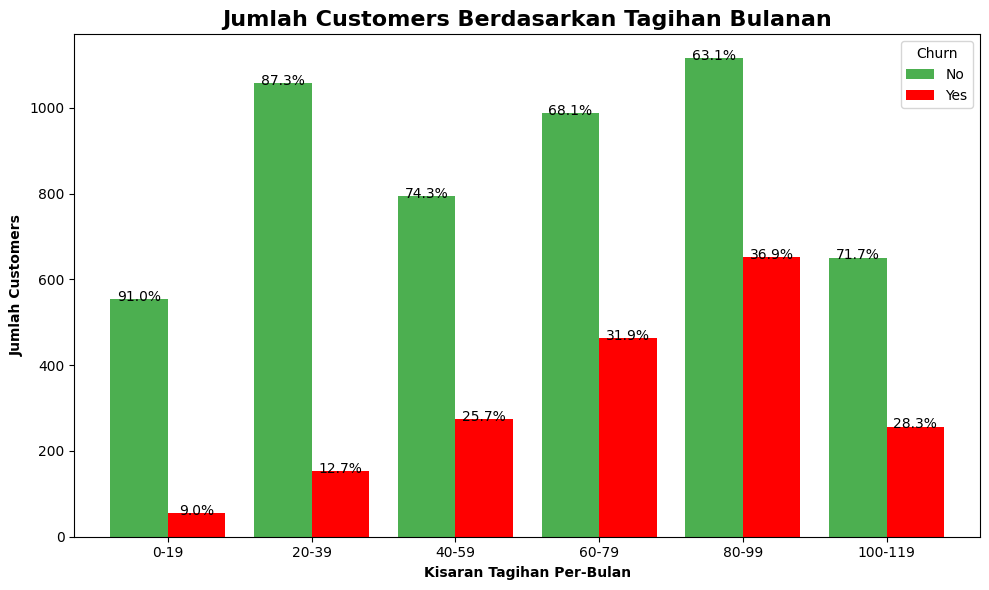

In [29]:
# Membuat Visualisasi Perbandingan Jumlah Customer Bersasarkan Tagihan Per-bulan

# Membuat Segmen Jumlah Tagihan
bins = np.arange(0, 121, 20)
labels = [f'{i}-{i+19}' for i in range(0, 120, 20)]
df['MonthlyChargeBin'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, right=False)
colors = ['#4CAF50', 'r']
# Mengelompokkan Customer Berdasarkan Segmen Jumlah Tagihan
grouped = df.groupby(['MonthlyChargeBin', 'Churn']).size().unstack(fill_value=0)

# Vissualisasi Bar Chart
ax = grouped.plot(kind='bar', stacked=False, figsize=(10, 6), width=0.8, color=colors)

# Membuat Label Presentase
bar_width = 0.4
for i, (label, row) in enumerate(grouped.iterrows()):
    total = row.sum()
    for j, val in enumerate(row):
        percentage = f"{val / total * 100:.1f}%"
        x_pos = i - bar_width / 2 + j * bar_width
        y_pos = val + 5 
        ax.text(x_pos, y_pos, percentage, ha='center', va='center', rotation=0)

# Mengatur Label Axis Chart
ax.set_xticklabels(labels, rotation=0)
ax.set_xlabel('Kisaran Tagihan Per-Bulan', fontweight='bold')
ax.set_ylabel('Jumlah Customers', fontweight='bold')
ax.set_title('Jumlah Customers Berdasarkan Tagihan Bulanan', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

<li> Pelanggan paling banyak memiliki kisaran tagihan $80 sampai $99, sedangkan diurutan kedua terbanyak adalah kisaran $20 sampai $39, dan selanjutnya pada kisaran tagihan $60 sampai $79.  
<li> Berdasarkan visualisasi diatas, terlihat ada kecenderungan untuk pelanggan yang memiliki tagigan yang besar memiliki "Churn Rate" yang juga semakin besar. Dapat dilihat pada rentang tagihan $80 hingga $99 sekitar 36% pelanggan yang berhenti berlangganan. Hal ini dapat mengindikasikan adanya kecendrungan ketidaksesuaian antara ekspektasi pelanggan terhadap tagihan yang dibayarkan.    

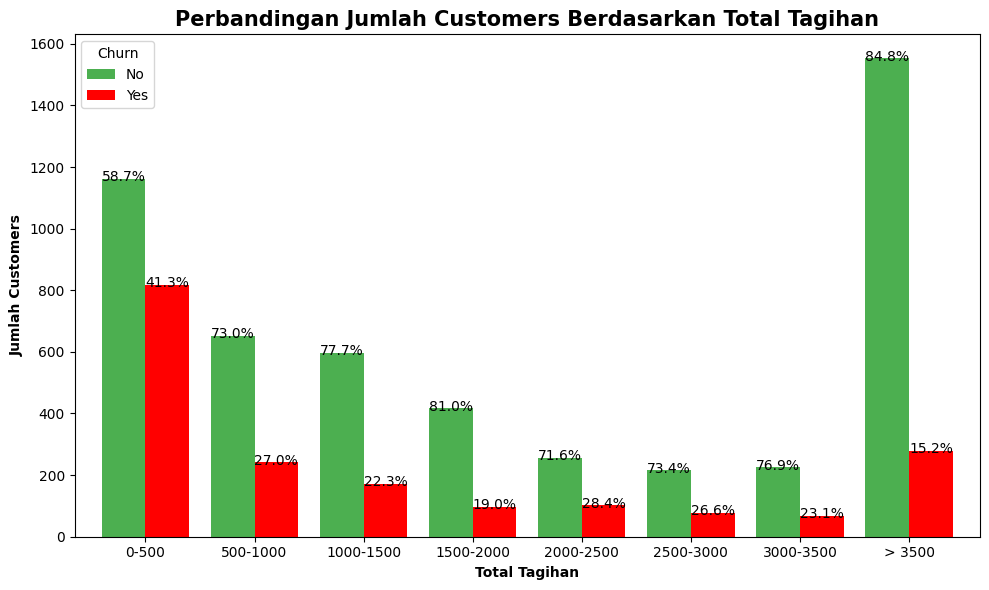

In [30]:
# Membuat Visualisasi Perbandingan Jumlah Customers Berdasarkan Total Tagihan

# Membuat Kelompok Segmen Total Tagihan
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 8000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '> 3500']
df['TotalChargeBin'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels, right=False)
colors = ['#4CAF50', 'r']
# Mengelompokkan Customer Berdasarkan Jumlah Tagihan yang dibayar
grouped = df.groupby(['TotalChargeBin', 'Churn']).size().unstack(fill_value=0)

# Visualisasi Bar Chart
ax = grouped.plot(kind='bar', stacked=False, figsize=(10, 6), width=0.8, color=colors)

# Menambah Label Presentase
bar_width = 0.4
for i, (label, row) in enumerate(grouped.iterrows()):
    total = row.sum()
    for j, val in enumerate(row):
        percentage = f"{val / total * 100:.1f}%"
        x_pos = i - bar_width / 2 + j * bar_width
        y_pos = val + 5 
        ax.text(x_pos, y_pos, percentage, ha='center', va='center', rotation=0)

# Mengatur Label Chart
ax.set_xticklabels(labels, rotation=0)
ax.set_xlabel('Total Tagihan', fontweight='bold')
ax.set_ylabel('Jumlah Customers', fontweight='bold')
ax.set_title('Perbandingan Jumlah Customers Berdasarkan Total Tagihan', fontweight='bold', fontsize=15)

plt.tight_layout()
plt.show()

<li> Mayoritas pelanggan memiliki total tagihan diatas $3500 per tahun atau pada kisaran tagihan yang paling besar. Namun, juga banyak pelanggan yang memiliki tagihan kurang dari $500 atau ini dapat diasumsikan pelanggan yang baru saja subscribe sehingga perhitungan tagihannya masih belum terkalkulasi pada saat data ini dikumpulkan.
<li> Jika dilihat berdasarkan presentase "Churn Rate", dapat dilihat bahwa nilai total tagihan 0 sampai $500 memiliki presentase yang paling besar, yaitu 41%. Hal ini mungkin terkait dengan banyaknya cancel subscription bagi pelanggan-pelanggan yang baru, sehingga total akumulasi tagihannya masih relatif sedikit. 

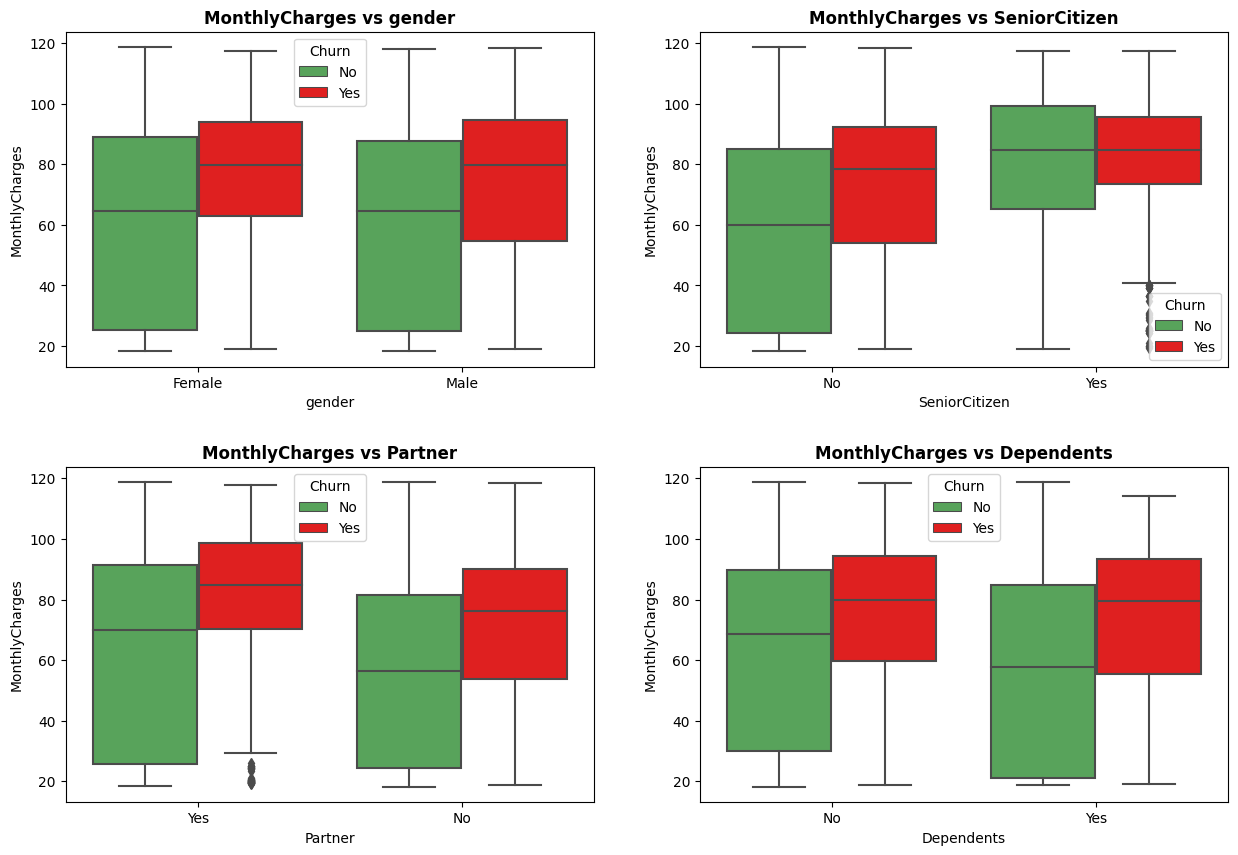

In [31]:
# Visualisasi Perbandingan Customers Berdasarkan Profil dan Tagihan Per-bulan
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'MonthlyCharges', data = df,hue = 'Churn', palette = colors);
    plt.subplots_adjust(hspace=0.3)
    plt.title('MonthlyCharges vs ' + l1[i], fontweight='bold');

<li> Secara garis besar, terlihat pelanggan memiliki rata-rata kisaran $60 hingga $90 pada saat memutuskan cancel subsription.
<li> Jika dilihat berdasarkan gender, terlihat baik laki-laki dan perempuan memilki total tagihan yang tidak berbeda, dan juga sedikit kecenderungan pada tagihan yang lebih besar lebih banyak yang cancel subscription.
<li> Terlihat pelanggan dengan usia lanjut memiliki rentang rata-rata tagihan bulanan yang lebih besar dibandingkan dengan pelanggan yang lebih muda. Namun, kedua golongan memiliki kesamaan dimana rentang tagihan pelanggan yang cancel subsription berada pada kisaran $80 rata-rata tertingginya.
<li> Pada pelanggan yang memilki pasangan terlihat memiliki rata-rata rentang tagihan yang lebih besar dibandingkan dengan yang belum berpasangan. Hal ini wajar dimana ketika sudah berpasnagan, umumnya layanan uang diperlukan juga semakin banyak. Tagihan kisaran $70 hingga $100 adalah kisaran tagihan dimana pelanggan memtuskan untuk bergenti berlangganan.
<li> Pada pelanggan yang memiliki tanggungan maupun tidak memiliki tanggungan memilki kisaran yang hampir sama dalam pembayaran tagihan, pada rentang tagihan sampai $90. Dengan pola yang juga sama, dimana pada rata-rata yang tagihan yang lebih besar pelanggan memutuskan berhenti berlangganan.    

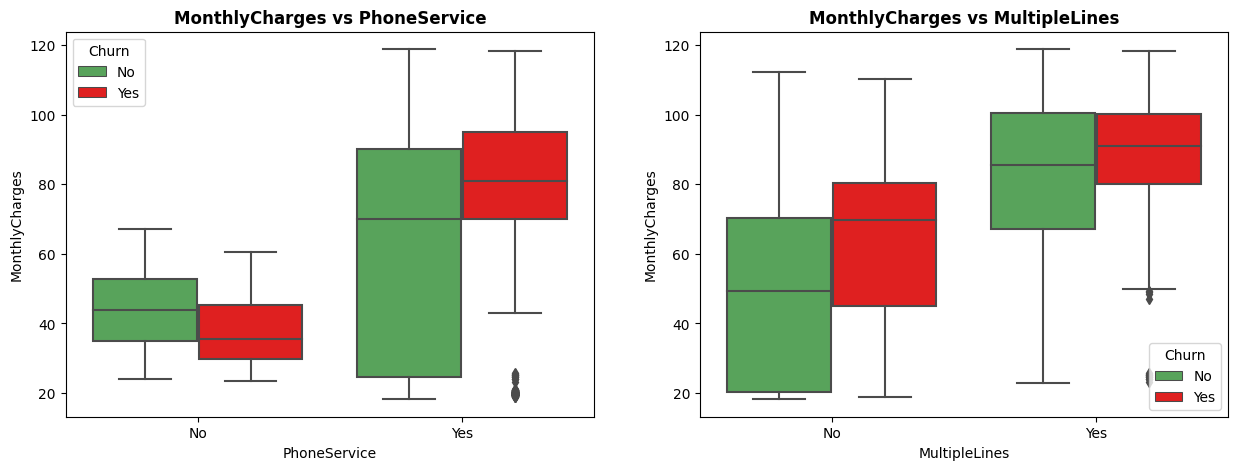

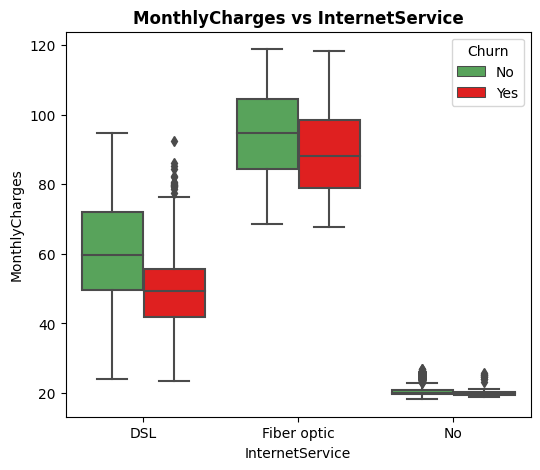

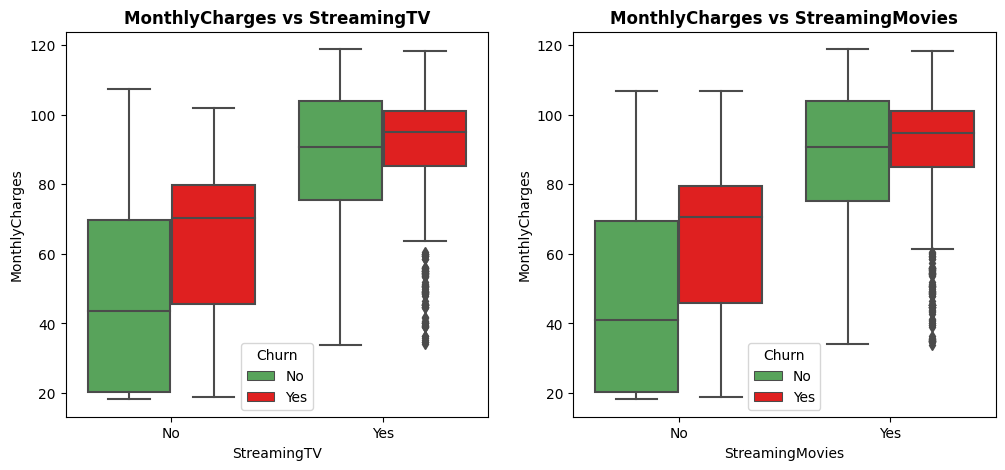

In [32]:
# Visualisasi Perbandingan Customers Berdasarkan Layanan dan Tagihan Bulanan
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'MonthlyCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i], fontweight='bold');

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'MonthlyCharges',data = df,hue = 'Churn',palette = colors);
plt.title('MonthlyCharges vs ' + l2[2], fontweight='bold');
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'MonthlyCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i + 3], fontweight='bold');

<li> Untuk peyediaan layanan telepon, terlihat produk "Multiple Lines" lebih mahal jika dilihat berdasarkan tagihan bulanannya. Untuk kedua layanan, baik "Phone Service" maupun "Multiple Lines" di rentang harga $75 hingga $90 rata-rata pelanggan memutuskan untuk berhenti berlangganan.
<li> Pelanggan yang menggunakan produk internet "DSL" terlihat lebih murah pembayaran tagihannya dibandingkan dengan produk "Fiber optic". Pelanggan terlihat rata-rata memutuskan berhenti berlangganan pada rentang tagihan $80 hingga $90 untuk layanan "Fiber Optic".
<li> Terkait layanan Streaming, TV dan Movies memiliki kisaran harga yang sama jika dilihat berdasarkan jumlah tagihannya perbulan. Pada rentang kisaran $80 hingga $90 adalah rata-rata dimana pelanggan melakukan cancel untuk layanan Streaming.

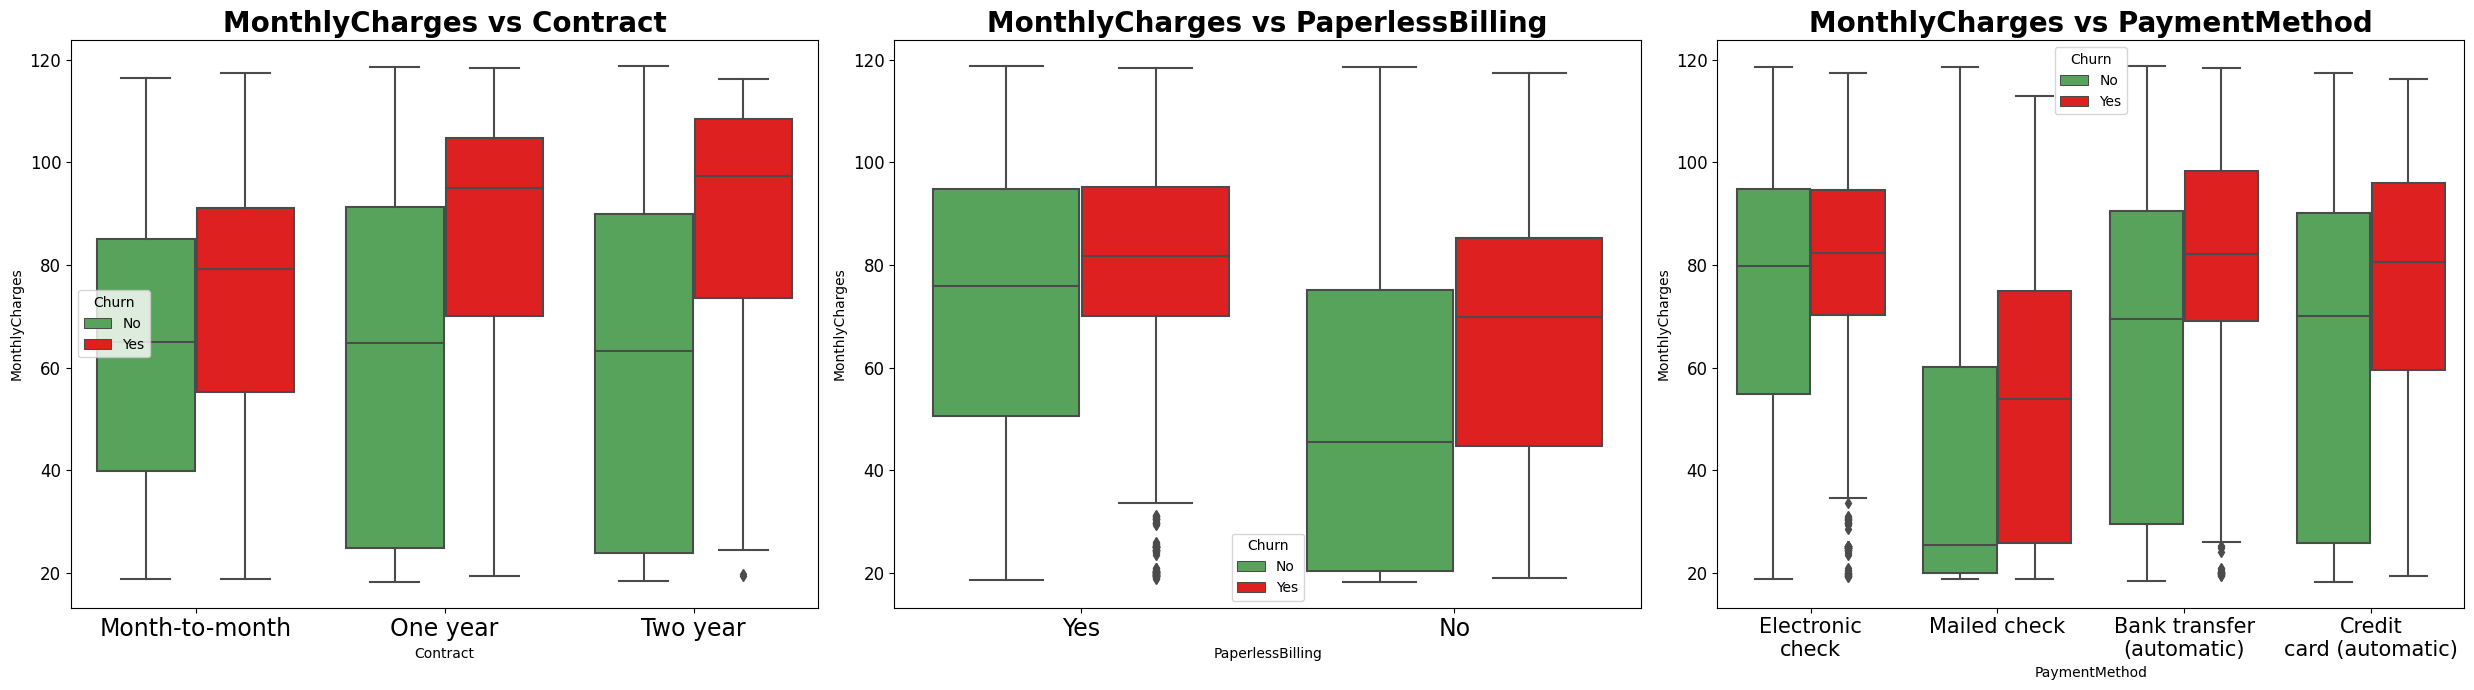

In [33]:
# Visualisasi Perbandingan Customers Berdasarkan Layanan dan Tipe Kontrak
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

for i in range(len(l3)):
    plt.subplot(1, 3, i + 1)
    ax = sns.boxplot(x=l3[i], y='MonthlyCharges', data=df, hue='Churn', palette=colors)
    plt.title('MonthlyCharges vs ' + l3[i], fontweight='bold', fontsize=20)
    # Increase the label sizes
    ax.tick_params(axis='x', labelsize=17)  
    ax.tick_params(axis='y', labelsize=12)  
    
def split_label(label):
    if len(label) <= 15:
        return label
    mid = len(label) // 2  
    # Mengatur label pada axis x
    split_point = mid + label[mid:].find(' ') 
    if split_point == mid:  
        split_point = label.rfind(' ', 0, mid)
    if split_point == -1:
        return label[:mid] + '\n' + label[mid:]  
    return label[:split_point] + '\n' + label[split_point+1:]

labels = [split_label(label.get_text()) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels, fontsize=15)


plt.tight_layout()
plt.show()

<li> Pada visualisasi diatas, terlihat ada kecenderungan untuk rata-rata tagihan yang lebih tinggi, pelanggan lebih memilih berhenti berlangganan. Hal ini konsiten terlihat pada pelanggan yang memiliki kontrak bulanan, tahunan, maupun tahunan. Pada kisaran tagihan yang lebih tinggi, pelanggan memutuskan untuk berhenti, dalam hal ini kisaran diatas $85.
<li> Pada pelanggan yang memiliki tagihan elektronik, terlihat memiliki kisaran yang tagihan lebih tigggi dibandingkan dengan non elektronik. Pelanggan yang tidak memiliki tagihan eletronik cenderung memutuskan langganan pada harga yang lebih rendah dikisaran $45 hingga $80.
<li> Pada pelanggan yang melakukan pembayaran tagihan "Mailed Check" terlihat memiliki rata-rata kisaran tagihan yang lebih rendah diabndingkan dengan pelanggan yang melakukan pembayaran dengan metode lain. Namun secara garis besar, terlihat pola yang mirip diantara semua tipe pembayaran pelanggan, dimana pelanggan yang memilih untuk berhenti berlangganan cenderung memiliki rata-rata tagihan yang tinggi. 

# v. Feature Engineering

## Handling Missing Values

In [34]:
# Mendeteksi Missing Data
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

TotalCharges      11
TotalChargeBin    89
dtype: int64


Berdasarkan pengecekan diatas, ditemukan data missing value. Dalam handling missing value, akan dilakukan identifikasi terhadap distribusi data terlebih dahulu untuk memilih strategi imputasi yang tepat.

In [35]:
# Mendfefinisikan fungsi untuk membuat boxplot dan histogram dari setiap feature numerik

def diagnostic_plots(df, variable):
    # Mendefinisikan figure size
    plt.figure(figsize=(16, 3))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram '+ variable )
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot ' + variable)
    plt.show()

    #Cek skew feature
    print('\nNilai Skewness ',variable, ' : ' , df[variable].skew())

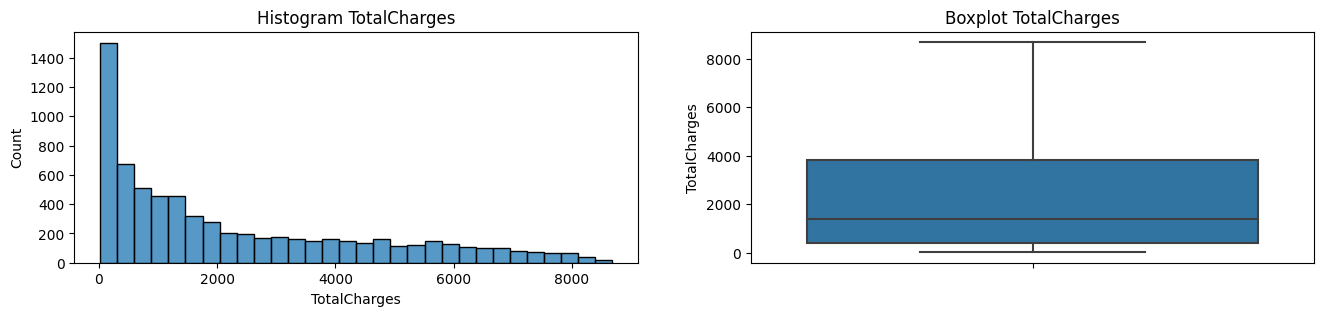


Nilai Skewness  TotalCharges  :  0.9583220586626408


In [36]:
#Pengecekan distribusi
diagnostic_plots(df,'TotalCharges')

Berdasarkan distribusi datanya, terlihat memiliki pola yang memanjang miring ke kanan dan juga terlihat nilai skewness yang mengindikasikan distribusinya miring ke kanan, ada kecenderungan tidak menyerupai distribusi yang normal, sehingga penggunaan nilai median untuk melakukan imputasi missing value.

In [37]:
# Isi null values dengan median
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

## Handling Outliers

Dalam mendeteksi outlier, teknik yang akan digunakan adalah menggunakan metode IQR. Tahapan yang dilakukan adalah:
<li>Mengidentifikasi nilai kuartil pertama (persentil ke-25) dari data.
<li>Mengidentifikasi nilai kuartil ketiga (persentil ke-75) dari data.
<li>Menentukan nilai tengah data (IQR) dihitung dengan mengurangkan kuartil pertama (Q1) dari kuartil ketiga (Q3).
<li>Mengitung batas bawah outlier = Q1 - 1,5 * IQR: (Nilai di bawah batas ini dianggap sebagai outlier).
<li>Mengitung batas atas outlier = Q3 + 1,5 * IQR: (Nilai apa pun di atas batas ini dianggap sebagai outlier).

TotalCharges - Jumlah outliers: 0, Presentase: 0.00%
MonthlyCharges - Jumlah outliers: 0, Presentase: 0.00%
tenure - Jumlah outliers: 0, Presentase: 0.00%


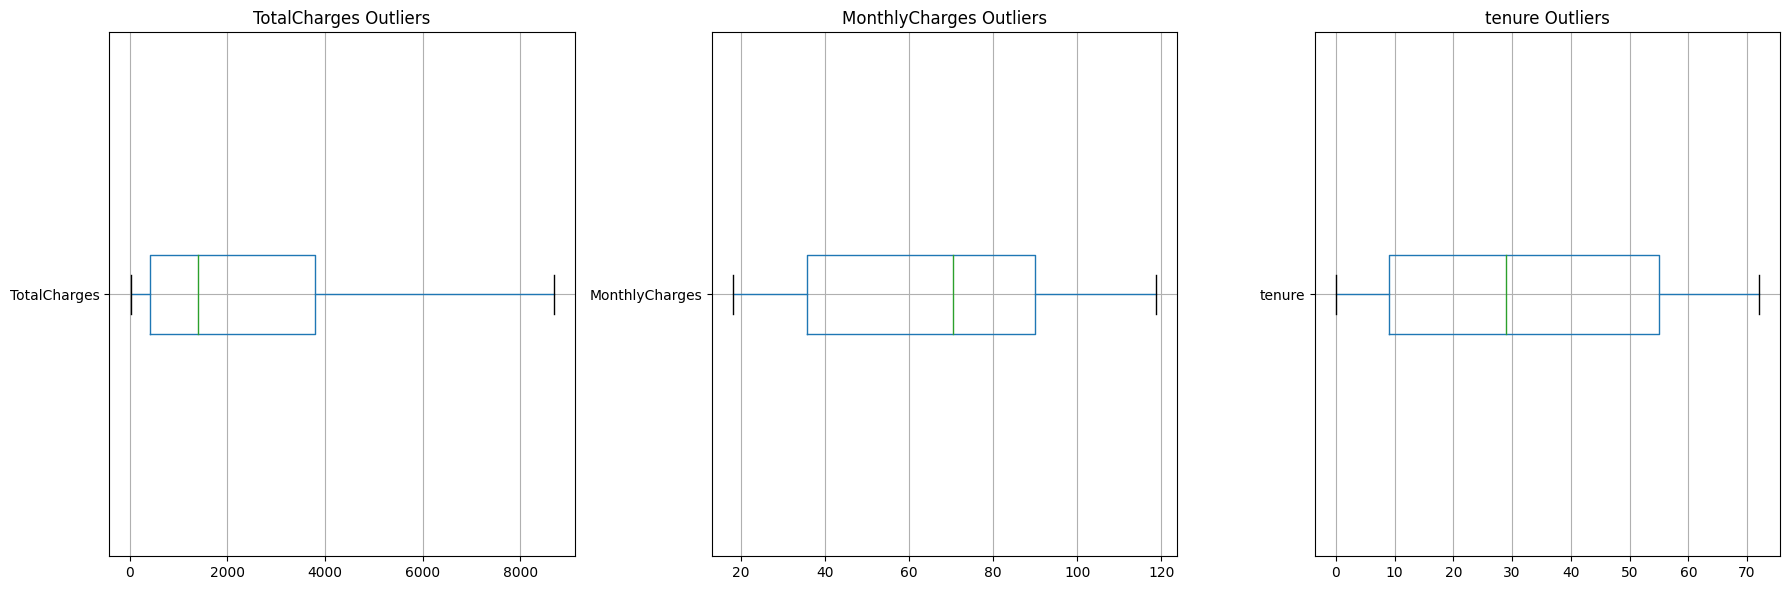

In [38]:
# Membuat fungsi deteksi outlier
def detect_outliers_using_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return (series < lower_bound) | (series > upper_bound)

def print_outlier_info(column_name, outliers):
    num_outliers = outliers.sum()
    percentage_outliers = (num_outliers / len(outliers)) * 100
    print(f"{column_name} - Jumlah outliers: {num_outliers}, Presentase: {percentage_outliers:.2f}%")

columns = ['TotalCharges', 'MonthlyCharges', 'tenure']

# Melakukan Deteksi outlier pada setiap kolom numerik
fig, axes = plt.subplots(1, len(columns), figsize=(18, 6))

for i, column_name in enumerate(columns):
    outliers = detect_outliers_using_iqr(df[column_name])
    print_outlier_info(column_name, outliers)
    
    df.boxplot(column=column_name, ax=axes[i], vert=False)
    axes[i].set_title(f'{column_name} Outliers')

plt.tight_layout()
plt.show()

Berdasarkan Hasil deteksi outlier menggunakan metode IQR, dapat disimpulkan bahwa tidak ditemukan adanya indikasi outlier yang signifkan dari data numerik ini, sehingga tidak diperlukan outlier handling.

## Scaling

Teknik scaling yang akan digunakan adalah MinMaxScaler dengan asumsi untuk fitur numerik memiliki rentang yang diketahui dan tidak ditemukan adanya outlier pada fitur numerik. Pada data ini terdapat 3 fitur numerik yang sesuai dengan kriteria dan akan ditransformasi menggunakan skala MinMaxScaler. 

In [39]:
# Memisahkan fitur numerik yang akan di scaling
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Mendefinisikan teknik scaling
numeric_transformer = MinMaxScaler()

## Encoding

Pada tahap ini akan mengubah variabel kategorikal menjadi format numerik sehingga dapat digunakan sebagi input pada model algoritma. Teknik yang digunakan adalah One-Hot Encoding untuk seluruh variabel kategorikal yang nominal dan pengkodean ordinal (Ordinal Encoding) untuk variabel kategorikal ordinal (memiliki tingkatan).

In [40]:
# Memisahkan fitur kategorikal Nominal
cat_cols_ohe = [col for col in df.columns if df[col].dtype == 'object' and col != 'Contract']
cat_cols_ohe.remove('Churn')

# Menggunakan Teknik Encoding OneHotEncoder
cat_cols_ohe_trasnformer = OneHotEncoder(drop='first') 

Variabel ordinal dalam data ini terdapat fitur yang didasarkan pada tingkatan waktu. Terdapat nilai 'Month-to-month', 'One year', 'Two year' pada kolom data 'Contract' : Pengkodean ordinal akan diimplementasikan berdasarkan panjang kontrak. 'Month-to-month' = 0, ''One year' = 1, dan 'Two year' = 2.

In [41]:
# Memisahkan fitur kategorikal Ordinal
cat_cols_ord = ['Contract']

# Teknik OrdinalEncoder dalam Menentukan tingkatan berdasarkan waktu kontrak 
contract_order = ['Month-to-month', 'One year', 'Two year']
contract_order_for_encoder = [contract_order]
cat_cols_ord_trasnformer = OrdinalEncoder(categories=contract_order_for_encoder)

## Transformasi Fitur

In [42]:
# Membuat proses transformasi fitur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat_ohe', cat_cols_ohe_trasnformer, cat_cols_ohe),
        ('cat_ord', cat_cols_ord_trasnformer, cat_cols_ord)
    ])

**Melakukan Split Data Train dan Test**

In [43]:
# Mentransformasi fitur target "Churn" menjadi nilai numerik 0 dan 1
df['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [44]:
# Memisahkan fitur dan variabel target
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Jumlah data Training :", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data Training : 5616
Jumlah data test: 1405


In [45]:
# Fit dan Transform Data
X_train_transformed = preprocessor.fit_transform(X_train)

## Melakukan Feature Selection

<li>Uji Chi-Squared: Untuk variabel kategorikal, menguji independensi dua variabel kategorikal untuk pemilihan fitur yang memiliki kemampuan paling kuat dalam memprediksi variabel target.
<li>Uji ANOVA: Untuk variabel numerik. ANOVA (Analysis of Variance) mengevaluasi perbedaan rata-rata kelompok dalam suatu sampel. 

**Uji Chi-Squared**      
Skor Chi-Squared yang tinggi menunjukkan bahwa fitur dapat memprediksi dengan baik variabel target. Nilai p value akan dijadikan ukuran dalam pengujian hipotesis:<ul>
<li> Hipotesis nol: Tidak ada keterkaitan antara variabel fitur terhadap variabel target </ul>

Nilai p value yang kecil (≤ 0,05) mengindikasikan penolakan hipotesis nol. Dalam konteks ini, artinya fitur tersebut kemungkinan besar terkait dengan variabel target.     
Nilai p value yang besar (> 0,05) mengindikasikan penerimaan hipotesis nol. Hal ini berarti fitur tersebut mungkin bukan prediktor yang baik terhadap variabel target.

In [46]:
# Mentransform fitur kategorikal Nominal dan Ordinal
X_train_cat = preprocessor.transformers_[1][1].fit_transform(X_train[cat_cols_ohe])  
X_train_ord = preprocessor.transformers_[2][1].fit_transform(X_train[cat_cols_ord])  

In [47]:
# Menggabungkan fitur kategorikal untuk Uji Chi-Squared
X_train_cat_dense = X_train_cat.toarray()  
X_train_transformed_cat = np.concatenate([X_train_cat_dense, X_train_ord], axis=1)

In [48]:
# Melakukan Uji Chi-Squared
chi_selector = SelectKBest(chi2, k='all') # Semua variabel kategorikal
chi_selector.fit(X_train_transformed_cat, y_train)
chi_scores = chi_selector.scores_

In [49]:
# Menampilkan Hasil Uji Chi-Squared
ohe_feature_names = preprocessor.named_transformers_['cat_ohe'].get_feature_names_out(cat_cols_ohe)
all_cat_features = np.concatenate([ohe_feature_names, cat_cols_ord])

for name, score in zip(all_cat_features, chi_scores):
    print(f"Fitur {name}: Score {score}")

Fitur gender_Male: Score 1.3703569099391877
Fitur SeniorCitizen_Yes: Score 106.73720899085063
Fitur Partner_Yes: Score 69.35522973292281
Fitur Dependents_Yes: Score 100.47088626763973
Fitur PhoneService_Yes: Score 0.10633054651558715
Fitur MultipleLines_Yes: Score 6.2569843933024725
Fitur InternetService_Fiber optic: Score 289.28950231518513
Fitur InternetService_No: Score 223.748527695059
Fitur OnlineSecurity_Yes: Score 115.97609346022122
Fitur OnlineBackup_Yes: Score 30.01095612815587
Fitur DeviceProtection_Yes: Score 14.659963559887311
Fitur TechSupport_Yes: Score 102.5682977068365
Fitur StreamingTV_Yes: Score 9.359757519275782
Fitur StreamingMovies_Yes: Score 12.524804537814065
Fitur PaperlessBilling_Yes: Score 85.42655878140279
Fitur PaymentMethod_Credit card (automatic): Score 72.10274485429434
Fitur PaymentMethod_Electronic check: Score 334.1891493635823
Fitur PaymentMethod_Mailed check: Score 37.362864226890395
Fitur Contract: Score 872.9784085843413


In [50]:
# Menampikan nilai p-value hasil Uji Chi-Squared
chi_p_values = chi_selector.pvalues_
for name, p_value in zip(all_cat_features, chi_p_values):
    print(f"Fitur {name}: p-value {p_value}")

Fitur gender_Male: p-value 0.24175057111303233
Fitur SeniorCitizen_Yes: p-value 5.082929058894718e-25
Fitur Partner_Yes: p-value 8.223428391733918e-17
Fitur Dependents_Yes: p-value 1.2015012512855294e-23
Fitur PhoneService_Yes: p-value 0.7443610672846948
Fitur MultipleLines_Yes: p-value 0.012370459881943194
Fitur InternetService_Fiber optic: p-value 7.101792397950622e-65
Fitur InternetService_No: p-value 1.3764636357527997e-50
Fitur OnlineSecurity_Yes: p-value 4.810607306076597e-27
Fitur OnlineBackup_Yes: p-value 4.296120808850414e-08
Fitur DeviceProtection_Yes: p-value 0.00012875223684630599
Fitur TechSupport_Yes: p-value 4.16749408414653e-24
Fitur StreamingTV_Yes: p-value 0.0022180148778956654
Fitur StreamingMovies_Yes: p-value 0.0004015849073118926
Fitur PaperlessBilling_Yes: p-value 2.404689817299264e-20
Fitur PaymentMethod_Credit card (automatic): p-value 2.0427940968630412e-17
Fitur PaymentMethod_Electronic check: p-value 1.175986085112017e-74
Fitur PaymentMethod_Mailed check: p-

**Berdasarkan hasil p value Uji Chi-Squared:**
variabel fitur gender_Male dan PhoneService_Yes memiliki nilai p > 0,05, yang menunjukkan bahwa fitur ini akan dieliminasi dikarenakan bukan merupakan prediktor Churn yang signifikan. Semua fitur lainnya terlihat memiliki nilai p value yang sangat mendekati 0, yang menunjukkan bukti kuat yang menentang hipotesis nol. Fitur-fitur ini kemungkinan besar terkait dengan Churn.

**Uji ANOVA**      
Hipotesis nol dalam uji ANOVA adalah bahwa semua kelompok (dalam konteks ini, kelompok didasarkan pada variabel target, yaitu 'Churn',  Kelompok 0  vs. Kelompok 1) memiliki rata-rata populasi yang sama untuk fitur tertentu, artinya rata-rata fitur numerik mungkin tidak berbeda secara signifikan antar kelompok. 
<ul><li>Semua grup pada variabel target "Churn" memiliki rata-rata populasi yang sama atau dalam artian fitur numerik ini tidak memiliki daya prediktor yang baik dalam mamprediksi kelompok "Churn" dan non "Churn".</ul>

In [51]:
# Mentransform fitur Numerik
X_train_num = preprocessor.transformers_[0][1].fit_transform(X_train[num_cols])

# Uji ANOVA F-test
anova_selector = SelectKBest(f_classif, k='all') # Semua Variabel Numerik
anova_selector.fit(X_train_num, y_train)
anova_scores = anova_selector.scores_

# Menampilkan Score F
for name, score in zip(num_cols, anova_scores):
     print(f"Fitur {name}: Score {score}")

Fitur tenure: Score 780.0935800571533
Fitur MonthlyCharges: Score 208.90662956482947
Fitur TotalCharges: Score 229.0151321566925


ANOVA (Analysis of Variance) memberikan nilai F sebagai uji statistik. Dalam konteks pemilihan fitur, nilai F yang lebih tinggi untuk suatu fitur menunjukkan hubungan yang lebih kuat dengan variabel target dibandingkan yang memiliki nilai F lebih rendah.

<li>"tenure": Memiliki nilai F tertinggi, menunjukkan bahwa ini mungkin fitur yang paling baik dalam menentukan churn pelanggan.
<li>"MonthlyCharges" dan "TotalCharges": Nilai-nilai F juga cukup besar, sehingga menunjukkan fitur ini sama-sama penting sebagai variabel prediktor.

In [52]:
# Menampikan nilai p-value hasil Uji ANOVA
p_values = anova_selector.pvalues_
for name, p_value in zip(num_cols, p_values):
    print(f"Fitur {name}: p-value {p_value}")

Fitur tenure: p-value 7.40587778409952e-161
Fitur MonthlyCharges: p-value 1.614292694740945e-46
Fitur TotalCharges: p-value 9.69071002384273e-51


**Berdasarkan hasil Uji ANOVA**: Semua fitur (tenure, MonthlyCharges, TotalCharges) memiliki nilai p yang sangat mendekati 0, yang menunjukkan bahwa fitur-fitur ini memiliki potensi menjadi prediktor yang baik untuk Churn.

In [53]:
# Melakukan trasnformasi fitur pada data train dan test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [54]:
# Step 1: Memilih fitur terbaik berdasarkan p-value uji Chi-Squared dan ANOVA
chi_pvalues = chi_selector.pvalues_
anova_pvalues = anova_selector.pvalues_

# Step 2: Menetapkan kriteria p-value
chi_keep_features = chi_pvalues < 0.05
anova_keep_features = anova_pvalues < 0.05

# Menggabungan semua fitur yang memiliki nlai p-value signifikan
final_keep_features = np.concatenate([anova_keep_features, chi_keep_features])

# Step 3: Transformasi ke data test dan train
X_train = X_train_transformed[:, final_keep_features]
X_test = X_test_transformed[:, final_keep_features]


## Teknik SMOTE Untuk Mengatasi Imbalanced Data

Setelah melakukan tahap pemprosesan data telah selesai, tahap selanjutnya adalah menerapkan SMOTE (Synthetic Minority Over-sampling Technique) ke set data training. Ini dilakukan untuk menyeimbangkan set training dengan mengambil sampel kelas minoritas agar lebih optimal antara jumlah data "Churn" dan "Non-Churn".

In [55]:
# Inisiasi SMOTE
smote = SMOTE(random_state=0)

# Mengaplikasikan SMOTE ke data training
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# vi. Model Definition

**Algoritma & Model**:      
Model algoritma yang digunakan adalah K-Nearest Neighbors (KNN) untuk model klasifikasi ini. Pada dasarnya, Model ini akan menentukan klasifikasi pelanggan dengan mempertimbangkan titik data berlabel 'k' terdekat dan memutuskan berdasarkan evaluasi atau rata-rata tertimbang.

**Hyperparameter:**    
<ul><li>n_neighbours: Ini mendefinisikan 'k' di KNN – jumlah tetangga terdekat yang perlu dipertimbangkan saat membuat prediksi, mengeksplorasi nilai dari 1 hingga 49 untuk menemukan angka optimal yang memberikan recall tertinggi untuk memprediksi churn.
<li>weights: Parameter ini menentukan bobot yang diberikan kepada setiap neighbors/tetangga. Ada dua opsi yang di pertimbangkan: uniform: Semua tetangga memiliki bobot yang sama, distance: Tetangga yang lebih dekat ke titik uji memiliki pengaruh lebih besar terhadap prediksi.
<li>metric: Ini untuk menentukan jarak yang digunakan dalam ruang, dengan membandingkan: euclidean: Jarak garis lurus antara dua titik, manhattan: Jumlah perbedaan absolut antar koordinat.</ul>         

**Cross Validations:**        
Untuk memastikan model dapat menggeneralisasi dengan baik pada data yang tidak terlihat, analisis ini menggunakan 5 pemisahan untuk cross-validations. Metode ini mempertahankan persentase sampel untuk setiap kelas di setiap kelompok, memastikan bahwa setiap kelompok merupakan representasi yang baik dari keseluruhan kumpulan data, terutama sifat data ini yang tidak seimbang.

Imbalanced Data: Saat ini, kumpulan data mencakup sekitar 70% data pelanggan "churn". Ketidakseimbangan ini dapat menghasilkan model yang bias dalam memprediksi kelas mayoritas.

**Metrik Utama** **Recall:**    
Mengingat fokus utama analisis ini untuk memprediksi status "Churn" secara akurat, Recall menjadi prioritas analisis ini. Dalam konteks analisis ini, Recall  yang tinggi menunjukkan bahwa model tersebut dapat mengidentifikasi sebagian besar pelanggan yang kemungkinan akan melakukan churn, sehingga memungkinkan perusahaan dapat mengambil tindakan tepat waktu.

# vii. Model Training

## Menggunakan Model KNN

In [56]:
# Model Baseline KNN
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [57]:
# Memprediksi Model
y_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train_smote)
print("Test Data Performance:")
print(classification_report(y_test, y_pred))
print("Training Data Performance:")
print(classification_report(y_train_smote, y_train_pred))

Test Data Performance:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1012
           1       0.48      0.71      0.57       393

    accuracy                           0.70      1405
   macro avg       0.67      0.71      0.67      1405
weighted avg       0.75      0.70      0.72      1405

Training Data Performance:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      4152
           1       0.80      0.95      0.87      4152

    accuracy                           0.86      8304
   macro avg       0.87      0.86      0.86      8304
weighted avg       0.87      0.86      0.86      8304



Menggunakan SMOTE:
<li>Data Training: Akurasi, presisi, perolehan, dan skor F1 yang sangat baik untuk kedua kelas. Model ini memiliki performa yang sangat baik pada data pelatihan.

<li>Data Test: Performa model jauh dibawah model training saat dievaluasi. Kelas 1, khususnya, memiliki presisi yang rendah, meskipun nilai Recall cukup tinggi. Artinya, meskipun model dengan baik mengidentifikasi dengan tepat sejumlah pelanggan "Churn", namun model ini juga banyak salah mengklasifikasikan "Churn" yang false postive atau mengklasifikasn customer yang tidak "Churn" sebagai customer "Churn".

In [58]:
# Memrediksi Model tanpa SMOTE
y_train_pred = knn.predict(X_train)
print("Training Data Performance tanpa SMOTE:")
print(classification_report(y_train, y_train_pred))

Training Data Performance tanpa SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      4152
           1       0.58      0.91      0.71      1464

    accuracy                           0.81      5616
   macro avg       0.77      0.84      0.78      5616
weighted avg       0.86      0.81      0.82      5616



Metrik Recall menghasilkan nilai yang tinggi tanpa menggunakan SMOTE, yang merupakan performa cukup maskimal dari data yang tidak seimbang, yang berarti model training berhasil mengidentifikasi sebagian besar pelanggan yang "Churn" tanpa menggunakan teknik resampling.

Perbandingan SMOTE dan tidak SMOTE:
Dengan teknik sampling SMOTE, model menjadi cenderung Overfitting yang diindikasikan dengan model berperforma sangat baik di set pelatihan, tetapi buruk di set pengujian. Hal ini menunjukkan bahwa model telah mempelajari data pelatihan terlalu maksimal, termasuk noise dan outliernya, tapi cenderung gagal melakukan generalisasi ke data baru yang tidak terlihat.

**Evaluasi Model dengan Hyperparameter Tuning GridSearch**

In [59]:
# Memisahkan Kembali Train dan Test untuk evaluasi Model 
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [60]:
# 1. Inisiasi dengan Pipiline
preprocessor = ColumnTransformer(
     transformers=[
         ('num', MinMaxScaler(), num_cols),
         ('cat_ohe', OneHotEncoder(drop='first'), cat_cols_ohe),
         ('cat_ord', OrdinalEncoder(categories=contract_order_for_encoder), cat_cols_ord)
     ])

# 2. Feature Selection:
chi_selector = SelectKBest(chi2, k='all')
anova_selector = SelectKBest(f_classif, k='all')

# Menggunakan Pipeline
feature_selection = Pipeline([
    ('preprocess', preprocessor),
    ('feature_select', FeatureUnion([("chi2", chi_selector), ("anova", anova_selector)]))
])

# 3. Final Pipeline
pipeline = Pipeline([
     ('features', feature_selection),
     ('knn', KNeighborsClassifier())
])

# Fit pipeline dengan data training 
pipeline.fit(X_train, y_train)


Pipeline(steps=[('features',
                 Pipeline(steps=[('preprocess',
                                  ColumnTransformer(transformers=[('num',
                                                                   MinMaxScaler(),
                                                                   ['tenure',
                                                                    'MonthlyCharges',
                                                                    'TotalCharges']),
                                                                  ('cat_ohe',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['gender',
                                                                    'SeniorCitizen',
                                                                    'Partner',
                                                                    'Dependents',
                                                                    'PhoneService',
                                                                    'MultipleLines',
                                                                    'InternetService',
                                                                    'OnlineSecurity',
                                                                    'OnlineBackup',
                                                                    'DeviceProtection',
                                                                    'TechS...
                                                                    'StreamingTV',
                                                                    'StreamingMovies',
                                                                    'PaperlessBilling',
                                                                    'PaymentMethod']),
                                                                  ('cat_ord',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]),
                                                                   ['Contract'])])),
                                 ('feature_select',
                                  FeatureUnion(transformer_list=[('chi2',
                                                                  SelectKBest(k='all',
                                                                              score_func=<function chi2 at 0x7f9fdb99a670>)),
                                                                 ('anova',
                                                                  SelectKBest(k='all'))]))])),
                ('knn', KNeighborsClassifier())])

In [61]:
# Menggunakan Hyperparameter Tuning
param_grid = {
    'knn__n_neighbors': np.arange(1, 40),
    'knn__weights': ['uniform'],
    'knn__metric': ['manhattan']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 39, 'knn__weights': 'uniform'}
Best cross-validation score: 0.5777777777777777


In [62]:
# Evaluasi Performa menggunakan cross_validate:
results = cross_validate(grid_search.best_estimator_, X_train, y_train, cv=5, return_train_score=True)
print("Train Mean Accuracy:", results['train_score'].mean())
print("Test Mean Accuracy:", results['test_score'].mean())

Train Mean Accuracy: 0.803953126650559
Test Mean Accuracy: 0.7929121918602624


Evaluasi Perfroma dengan cross_validate:
Performa: Akurasi data test sebesar 79,3% menunjukkan bahwa model ini berperforma cukup baik, Perbedaan antara akurasi pelatihan dan akurasi test adalah sekitar 1,1%. Perbedaan ini relatif kecil, yang menunjukkan bahwa model tersebut dapat menggeneralisasi dengan baik data yang tidak terlihat dan tidak mengindikasikan overfitting.

In [63]:
# Evaluasi Model dengan Hyperparameter tuning
y_pred = grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)

print("Test Data Performance:")
print(classification_report(y_test, y_pred))
print("Training Data Performance:")
print(classification_report(y_train, y_train_pred))

Test Data Performance:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       372

    accuracy                           0.79      1405
   macro avg       0.74      0.72      0.73      1405
weighted avg       0.79      0.79      0.79      1405

Training Data Performance:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4131
           1       0.64      0.60      0.62      1485

    accuracy                           0.81      5616
   macro avg       0.75      0.74      0.74      5616
weighted avg       0.80      0.81      0.80      5616



Kesimpulan Setelah Hyperparameter Tuning:
<li>Tuning hyperparameter memperbaiki model secara keseluruhan. Akurasi keseluruhan dan metrik untuk kedua kelas meningkat setelah proses tuning.
<li> Perolehan Recall untuk Kelas 1 menurun, namun presisi meningkat signifikan untuk Kelas 1 dan peningkatan skor F1 secara keseluruhan untuk kedua kelas. Walaupun model ini lebih baik, namun model ini memprioritaskan presisi daripada perolehan nilai Recall untuk Kelas 1, sehingga untuk tujuan utama analisis ini kurang relevan.

## Menggunakan Model SVM

In [64]:
# Memisahkan Kembali Train dan Test untuk evaluasi Model
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [65]:
# Menggunakan Model SVM Baseline
# 1. Inisiasi dengan Pipiline
preprocessor = ColumnTransformer(
     transformers=[
         ('num', MinMaxScaler(), num_cols),
         ('cat_ohe', OneHotEncoder(drop='first'), cat_cols_ohe),
         ('cat_ord', OrdinalEncoder(categories=contract_order_for_encoder), cat_cols_ord)
     ])

# 2. Feature Selection
chi_selector = SelectKBest(chi2, k='all')
anova_selector = SelectKBest(f_classif, k='all')

# Menggunakan Pipeline
feature_selection = Pipeline([
    ('preprocess', preprocessor),
    ('feature_select', FeatureUnion([("chi2", chi_selector), ("anova", anova_selector)]))
])

# 3. Final Pipeline
pipeline = Pipeline([
    ('features', feature_selection),
    ('svm', SVC())
])

# Fit pipeline dengan training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('features',
                 Pipeline(steps=[('preprocess',
                                  ColumnTransformer(transformers=[('num',
                                                                   MinMaxScaler(),
                                                                   ['tenure',
                                                                    'MonthlyCharges',
                                                                    'TotalCharges']),
                                                                  ('cat_ohe',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['gender',
                                                                    'SeniorCitizen',
                                                                    'Partner',
                                                                    'Dependents',
                                                                    'PhoneService',
                                                                    'MultipleLines',
                                                                    'InternetService',
                                                                    'OnlineSecurity',
                                                                    'OnlineBackup',
                                                                    'DeviceProtection',
                                                                    'TechSupport',
                                                                    'StreamingTV',
                                                                    'StreamingMovies',
                                                                    'PaperlessBilling',
                                                                    'PaymentMethod']),
                                                                  ('cat_ord',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]),
                                                                   ['Contract'])])),
                                 ('feature_select',
                                  FeatureUnion(transformer_list=[('chi2',
                                                                  SelectKBest(k='all',
                                                                              score_func=<function chi2 at 0x7f9fdb99a670>)),
                                                                 ('anova',
                                                                  SelectKBest(k='all'))]))])),
                ('svm', SVC())])

In [66]:
# Evaluasi Performa Model Baseline SVM
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Test Data
print("Test Data Evaluation:")
print(classification_report(y_test, y_test_pred))

# Training Data
print("Training Data Evaluation:")
print(classification_report(y_train, y_train_pred))

Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.45      0.53       372

    accuracy                           0.78      1405
   macro avg       0.72      0.68      0.69      1405
weighted avg       0.77      0.78      0.77      1405

Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4131
           1       0.72      0.54      0.62      1485

    accuracy                           0.82      5616
   macro avg       0.78      0.73      0.75      5616
weighted avg       0.81      0.82      0.81      5616



**Evaluasi Model SVM Baseline:**      
<li>Model SVM mengungguli KNN dalam hal akurasi keseluruhan dan metrik untuk Kelas 0. Model SVM juga memiliki presisi lebih tinggi untuk Kelas 1.

<li>KNN memiliki kinerja lebih baik dalam nilai Recall untuk Kelas 1. Dalam konteks analisis ini fokus untuk mengidentifikasi Kelas 1 dengan benar, model KNN mungkin lebih baik dibanding Model SVM, meskipun akurasi keseluruhannya lebih rendah, tetapi nilai Recall yang jauh lebih tinggi.

In [67]:
# Menggunakan hyperparameter Tuning

param_dist = {
    'svm__C': reciprocal(1, 50),          
    'svm__gamma': uniform(0.1, 1),         
    'svm__kernel': ['linear', 'rbf'],      
}

# Menggunakan RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, 
                                   param_distributions=param_dist,
                                   n_iter=5,           
                                   scoring='recall',   
                                   cv=5,                
                                   n_jobs=-1)           

random_search.fit(X_train, y_train)

# Evaluasi Perfroma:
best_pipeline = random_search.best_estimator_  

cv_results = cross_validate(best_pipeline, X_train, y_train, scoring=['recall'], cv=5, return_train_score=True)

# Menampilkan Hasil
print("Train Recall:", cv_results['train_recall'].mean())
print("Validation Recall:", cv_results['test_recall'].mean())


Train Recall: 0.5537037037037038
Validation Recall: 0.5569023569023569


In [68]:
# Evaluasi Model SVM dengan Hperparameter Tuning
y_train_pred = random_search.best_estimator_.predict(X_train)
y_pred = random_search.best_estimator_.predict(X_test)

# Untuk Test Data
print("Test Data Evaluation:")
print(classification_report(y_test, y_pred))

# Untuk Training Data
print("Training Data Evaluation:")
print(classification_report(y_train, y_train_pred))


Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       372

    accuracy                           0.79      1405
   macro avg       0.73      0.70      0.71      1405
weighted avg       0.78      0.79      0.78      1405

Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4131
           1       0.65      0.55      0.60      1485

    accuracy                           0.80      5616
   macro avg       0.75      0.72      0.74      5616
weighted avg       0.80      0.80      0.80      5616



**Kesimpulan Evaluasi Model Data Test**

<li>Penggunaan hyperparameter tuning telah menghasilkan peningkatan Recall untuk kelas 1 (dari 0,45 menjadi 0,51). Ini berarti model SVM setelah tuning lebih baik dalam mengidentifikasi instance false positive.

<li>Akurasi Keseluruhan Meningkat: Akurasi keseluruhan model telah meningkat setelah penyetelan hyperparameter (dari 0,78 menjadi 0,79), yang menunjukkan bahwa secara keseluruhan, prediksi model menjadi lebih akurat.

<li>Peningkatan skor F1: Skor f1 untuk kelas 1 meningkat dari 0,53 menjadi 0,56, menunjukkan keseimbangan yang lebih optimal antara presisi dan Recall untuk kelas ini setelah penyetelan.


## Menggunakan Model Decsion Tree

In [69]:
# Memisahkan Kembali Train dan Test untuk evaluasi Model
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [70]:
# Menggunakan Model Decision Tree Baseline
# 1. Inisiasi dengan Pipiline
preprocessor = ColumnTransformer(
     transformers=[
         ('num', MinMaxScaler(), num_cols),
         ('cat_ohe', OneHotEncoder(drop='first'), cat_cols_ohe),
         ('cat_ord', OrdinalEncoder(categories=contract_order_for_encoder), cat_cols_ord)
     ])

# 2. Feature Selection
chi_selector = SelectKBest(chi2, k='all')
anova_selector = SelectKBest(f_classif, k='all')

# Menggunakan Pipeline
feature_selection = Pipeline([
    ('preprocess', preprocessor),
    ('feature_select', FeatureUnion([("chi2", chi_selector), ("anova", anova_selector)]))
])

# 3. Final Pipeline
pipeline = Pipeline([
    ('features', feature_selection),
    ('classifier', DecisionTreeClassifier(random_state=0))
])

# Fit pipeline dengan training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('features',
                 Pipeline(steps=[('preprocess',
                                  ColumnTransformer(transformers=[('num',
                                                                   MinMaxScaler(),
                                                                   ['tenure',
                                                                    'MonthlyCharges',
                                                                    'TotalCharges']),
                                                                  ('cat_ohe',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['gender',
                                                                    'SeniorCitizen',
                                                                    'Partner',
                                                                    'Dependents',
                                                                    'PhoneService',
                                                                    'MultipleLines',
                                                                    'InternetService',
                                                                    'OnlineSecurity',
                                                                    'OnlineBackup',
                                                                    'DeviceProtection',
                                                                    'TechS...
                                                                    'PaperlessBilling',
                                                                    'PaymentMethod']),
                                                                  ('cat_ord',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]),
                                                                   ['Contract'])])),
                                 ('feature_select',
                                  FeatureUnion(transformer_list=[('chi2',
                                                                  SelectKBest(k='all',
                                                                              score_func=<function chi2 at 0x7f9fdb99a670>)),
                                                                 ('anova',
                                                                  SelectKBest(k='all'))]))])),
                ('classifier', DecisionTreeClassifier(random_state=0))])

In [71]:
# Evaluasi Model Baseline Decision Tree
y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

# Untuk Test Data
print("Test Data Evaluation:")
print(classification_report(y_test, y_pred))

# Untuk Training Data
print("Training Data Evaluation:")
print(classification_report(y_train, y_train_pred))

Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1033
           1       0.49      0.51      0.50       372

    accuracy                           0.73      1405
   macro avg       0.65      0.66      0.65      1405
weighted avg       0.73      0.73      0.73      1405

Training Data Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4131
           1       1.00      0.99      1.00      1485

    accuracy                           1.00      5616
   macro avg       1.00      1.00      1.00      5616
weighted avg       1.00      1.00      1.00      5616



**Evaluasi Model Baseline Decsion Tree** 
<li>Kecenderungan overfit yang sangat signifikan, sehingga akan dilakukan evaluasi lebih lanjut dengan menggunakan Hyperparameter tuning

In [72]:
# Menggunakan Hyperparameter untuk evaluasi model Decision Tree

param_dist = {
    'classifier__max_depth': [None] + list(range(1, 21)),  
    'classifier__min_samples_split': range(2, 21),         
    'classifier__min_samples_leaf': range(1, 21)           
}

# Menggunakan RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, 
                                   param_distributions=param_dist,
                                   n_iter=50,              
                                   scoring='recall',       
                                   cv=5,                   
                                   n_jobs=-1,              
                                   random_state=0)

random_search.fit(X_train, y_train)

# Evaluasi dengan cross_validate
best_pipeline = random_search.best_estimator_  

cv_results = cross_validate(best_pipeline, X_train, y_train, scoring=['recall'], cv=5, return_train_score=True)

# Menampilkan Hasil
print("Best Parameters:", random_search.best_params_)
print("Train Recall:", cv_results['train_recall'].mean())
print("Validation Recall:", cv_results['test_recall'].mean())


Best Parameters: {'classifier__min_samples_split': 9, 'classifier__min_samples_leaf': 15, 'classifier__max_depth': 2}
Train Recall: 0.6289562289562289
Validation Recall: 0.6289562289562289


In [73]:
# Evaluasi Model Decision Tree dengan Hperparameter Tuning
y_train_pred = random_search.best_estimator_.predict(X_train)
y_pred = random_search.best_estimator_.predict(X_test)

# Untuk Test Data
print("Test Data Evaluation:")
print(classification_report(y_test, y_pred))

# Untuk Training Data
print("Training Data Evaluation:")
print(classification_report(y_train, y_train_pred))


Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1033
           1       0.53      0.60      0.56       372

    accuracy                           0.75      1405
   macro avg       0.69      0.70      0.70      1405
weighted avg       0.76      0.75      0.76      1405

Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      4131
           1       0.55      0.63      0.59      1485

    accuracy                           0.76      5616
   macro avg       0.70      0.72      0.71      5616
weighted avg       0.78      0.76      0.77      5616



**Evaluasi Model Decision Tree**

<li>Model KNN baseline masih memiliki kinerja yang lebih baik dalam hal recall untuk kelas 1 dengan skor 0,71 dibandingkan dengan skor Decision Tree sebesar 0,60. Sesuai dengan meterik utama yang digunakan adalah memaksimalkan Recall untuk kelas 1, model KNN masih menjadi model yang paling optimal.

<li>Model Decision Tree memiliki akurasi keseluruhan yang lebih tinggi dibandingkan model KNN. Artinya, dalam hal membuat prediksi yang benar di kedua kelas, kinerja Decsion Tree sedikit lebih baik.

## Menggunakan Model Random Forest

In [74]:
# Memisahkan Kembali Train dan Test untuk evaluasi Model
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [75]:
# Menggunakan Model Random Forest Baseline
# 1. Inisiasi dengan Pipiline
preprocessor = ColumnTransformer(
     transformers=[
         ('num', MinMaxScaler(), num_cols),
         ('cat_ohe', OneHotEncoder(drop='first'), cat_cols_ohe),
         ('cat_ord', OrdinalEncoder(categories=contract_order_for_encoder), cat_cols_ord)
     ])

# 2. Feature Selection
chi_selector = SelectKBest(chi2, k='all')
anova_selector = SelectKBest(f_classif, k='all')

# Menggunakan Pipeline
feature_selection = Pipeline([
    ('preprocess', preprocessor),
    ('feature_select', FeatureUnion([("chi2", chi_selector), ("anova", anova_selector)]))
])

# 3. Final Pipeline
pipeline = Pipeline([
    ('features', feature_selection),
    ('classifier', RandomForestClassifier(random_state=0))
])

# Fit pipeline dengan training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('features',
                 Pipeline(steps=[('preprocess',
                                  ColumnTransformer(transformers=[('num',
                                                                   MinMaxScaler(),
                                                                   ['tenure',
                                                                    'MonthlyCharges',
                                                                    'TotalCharges']),
                                                                  ('cat_ohe',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['gender',
                                                                    'SeniorCitizen',
                                                                    'Partner',
                                                                    'Dependents',
                                                                    'PhoneService',
                                                                    'MultipleLines',
                                                                    'InternetService',
                                                                    'OnlineSecurity',
                                                                    'OnlineBackup',
                                                                    'DeviceProtection',
                                                                    'TechS...
                                                                    'PaperlessBilling',
                                                                    'PaymentMethod']),
                                                                  ('cat_ord',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]),
                                                                   ['Contract'])])),
                                 ('feature_select',
                                  FeatureUnion(transformer_list=[('chi2',
                                                                  SelectKBest(k='all',
                                                                              score_func=<function chi2 at 0x7f9fdb99a670>)),
                                                                 ('anova',
                                                                  SelectKBest(k='all'))]))])),
                ('classifier', RandomForestClassifier(random_state=0))])

In [76]:
# Evaluasi Model Baseline Decision Tree
y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

# Untuk Test Data
print("Test Data Evaluation:")
print(classification_report(y_test, y_pred))

# Untuk Training Data
print("Training Data Evaluation:")
print(classification_report(y_train, y_train_pred))

Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       372

    accuracy                           0.79      1405
   macro avg       0.73      0.69      0.70      1405
weighted avg       0.78      0.79      0.78      1405

Training Data Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4131
           1       0.99      1.00      1.00      1485

    accuracy                           1.00      5616
   macro avg       1.00      1.00      1.00      5616
weighted avg       1.00      1.00      1.00      5616



**Evaluasi Model Baseline Random Forest** 
<li>Kecenderungan overfit yang sangat signifikan, sehingga akan dilakukan evaluasi lebih lanjut dengan menggunakan Hyperparameter tuning. 

In [77]:
# Menggunakan Hyperparameter untuk Evaluasi Model Baseline
param_dist = {
    'classifier__n_estimators': [10, 50, 100, 200],           
    'classifier__max_depth': [None] + list(range(1, 21)),     
    'classifier__min_samples_split': range(2, 21),            
    'classifier__min_samples_leaf': range(1, 21)             
}

pipeline = Pipeline([
    ('features', feature_selection),
    ('classifier', RandomForestClassifier(random_state=0))
])

# Menggunakan RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, 
                                   param_distributions=param_dist,
                                   n_iter=50,                 
                                   scoring='recall',          
                                   cv=5,                      
                                   n_jobs=-1,                
                                   random_state=0)

random_search.fit(X_train, y_train)

# Evaluasi dengan cross_validate
best_pipeline = random_search.best_estimator_  

cv_results = cross_validate(best_pipeline, X_train, y_train, scoring=['recall'], cv=5, return_train_score=True)

# Menampilkan Hasil 
print("Best Parameters:", random_search.best_params_)
print("Train Recall:", cv_results['train_recall'].mean())
print("Validation Recall:", cv_results['test_recall'].mean())


Best Parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 14, 'classifier__min_samples_leaf': 3, 'classifier__max_depth': 11}
Train Recall: 0.648989898989899
Validation Recall: 0.5259259259259259


In [78]:
# Evaluasi Model Random Forest dengan Hperparameter Tuning
y_train_pred = random_search.best_estimator_.predict(X_train)
y_pred = random_search.best_estimator_.predict(X_test)

# Untuk Test Data
print("Test Data Evaluation:")
print(classification_report(y_test, y_pred))

# Untuk Training Data
print("Training Data Evaluation:")
print(classification_report(y_train, y_train_pred))


Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.48      0.55       372

    accuracy                           0.79      1405
   macro avg       0.74      0.69      0.71      1405
weighted avg       0.78      0.79      0.78      1405

Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4131
           1       0.80      0.65      0.72      1485

    accuracy                           0.86      5616
   macro avg       0.84      0.80      0.81      5616
weighted avg       0.86      0.86      0.86      5616



**Evaluasi Model Random Forest dengan Hyperparameter Tuning**

<li>Model Random Forest memiliki kinerja yang overit baik sebelum dan seaudah dilakukan Hyperparameter tuning. Kinerja Data training jauh lebih baik dibandingkan dengan data test. Perbedaan ini relatif besar, yang menunjukkan bahwa model ini tidak dapat menggeneralisasi dengan baik data yang tidak terlihat dan memiliki daya prediktif yang lemah terhadap data baru.

## Mengimplementasikan Model Algoritma Boosting

In [79]:
# Memisahkan Kembali Train dan Test untuk evaluasi Model
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [80]:
# Menggunakan XGBoost Baseline
# 1. Inisiasi dengan Pipiline
preprocessor = ColumnTransformer(
     transformers=[
         ('num', MinMaxScaler(), num_cols),
         ('cat_ohe', OneHotEncoder(drop='first'), cat_cols_ohe),
         ('cat_ord', OrdinalEncoder(categories=contract_order_for_encoder), cat_cols_ord)
     ])

# 2. Feature Selection
chi_selector = SelectKBest(chi2, k='all')
anova_selector = SelectKBest(f_classif, k='all')

# Menggunakan Pipeline
feature_selection = Pipeline([
    ('preprocess', preprocessor),
    ('feature_select', FeatureUnion([("chi2", chi_selector), ("anova", anova_selector)]))
])

# 3. Final Pipeline
pipeline = Pipeline([
    ('features', feature_selection),
    ('classifier', XGBClassifier())
])

# Fit pipeline dengan training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('features',
                 Pipeline(steps=[('preprocess',
                                  ColumnTransformer(transformers=[('num',
                                                                   MinMaxScaler(),
                                                                   ['tenure',
                                                                    'MonthlyCharges',
                                                                    'TotalCharges']),
                                                                  ('cat_ohe',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['gender',
                                                                    'SeniorCitizen',
                                                                    'Partner',
                                                                    'Dependents',
                                                                    'PhoneService',
                                                                    'MultipleLines',
                                                                    'InternetService',
                                                                    'OnlineSecurity',
                                                                    'OnlineBackup',
                                                                    'DeviceProtection',
                                                                    'TechS...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [81]:
# Menggunakan Hyperparameter Tuning untuk XGBoost
param_dist = {
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': list(range(1, 11)),  
    'classifier__scale_pos_weight': [2.33]  # rasio Imbalanced data
}

pipeline = Pipeline([
    ('features', feature_selection),
    ('classifier', XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'))
])

# Menggunakan RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, 
                                   param_distributions=param_dist,
                                   n_iter=50,              
                                   scoring='recall',       
                                   cv=5,                   
                                   n_jobs=-1,            
                                   random_state=0)

random_search.fit(X_train, y_train)

# Evaluasi dengancross_validate
best_pipeline = random_search.best_estimator_  

cv_results = cross_validate(best_pipeline, X_train, y_train, scoring=['recall'], cv=5, return_train_score=True)

# Menampilkan hasil evaluasi
print("Best Parameters:", random_search.best_params_)
print("Train Recall for Class 1 (churn):", cv_results['train_recall'].mean())
print("Validation Recall for Class 1 (churn):", cv_results['test_recall'].mean())


Best Parameters: {'classifier__scale_pos_weight': 2.33, 'classifier__n_estimators': 100, 'classifier__max_depth': 2, 'classifier__learning_rate': 0.01}
Train Recall for Class 1 (churn): 0.8254208754208754
Validation Recall for Class 1 (churn): 0.8249158249158249


In [82]:
# Evaluasi Model XGBoost dengan Hperparameter Tuning
y_train_pred = random_search.best_estimator_.predict(X_train)
y_pred = random_search.best_estimator_.predict(X_test)

# Untuk Test Data
print("Test Data Evaluation:")
print(classification_report(y_test, y_pred))

# Untuk Training Data
print("Training Data Evaluation:")
print(classification_report(y_train, y_train_pred))


Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.79      0.61       372

    accuracy                           0.73      1405
   macro avg       0.70      0.75      0.70      1405
weighted avg       0.79      0.73      0.74      1405

Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      4131
           1       0.51      0.82      0.62      1485

    accuracy                           0.74      5616
   macro avg       0.71      0.76      0.71      5616
weighted avg       0.81      0.74      0.75      5616



**Evaluasi Model XGBoost:**
<li>Model ini memiliki tingkat Recall yang tertinggi dibandingkan dengan seluruh model yang diuji, khusunya untuk kelas 1 ('Churn'). Recall pada data validasi juga tinggi dan sangat mendekati recall training, yaitu sekitar 82%.

<li>Model XGBoost berkinerja secara konsisten pada kumpulan data pelatihan dan validasi dan test. Nilai recall yang sangat dekat antara set pelatihan, data test dan validasi menunjukkan bahwa model ini tidak overfitting. Dengan menyediakan parameter terbaik, model ini telah disesuaikan dengan baik untuk masalah memprediksi churn, terutama dalam hal mengidentifikasi dengan benar pelanggan yang kemungkinan besar akan churn. Artinya, dalam skenario dunia nyata, model ini akan efektif dalam membantu menargetkan sekitar mendekati 80% pelanggan yang berisiko churn.

# viii. Model Evaluation


**Perbandingan Recall Model Terbaik SVM dan XGboost:**<ul>
<li>Recall (Kelas 1): Model XGBoost mengidentifikasi 79% kasus churn aktual dengan tepat, sedangkan model KNN mengidentifikasi 71%. Dengan demikian, XGBoost mengungguli KNN dalam hal Recall untuk memprediksi churn.
<li>Pecall untuk Non-Churn (Kelas 0): Kedua model memiliki nilai yang hampir sama untuk kasus non-churn, dengan XGBoost memiliki kinerja yang sedikit lebih baik yaitu 71% dibandingkan dengan KNN yang sebesar 70%.</ul>

**Perbandingan Presisi: Model Terbaik SVM dan XGboost:**<ul>
<li>Untuk churn (Kelas 1), presisi lebih tinggi pada model XGBoost 49% dibandingkan model KNN 48%. Artinya, dari kasus churn yang diprediksi model XGBoost, 49% merupakan kasus churn, sedangkan untuk KNN sebesar 48%. 
<li>Untuk non-churn (Kelas 0), presisi secara signifikan lebih tinggi pada model XGBoost 90% dibandingkan model KNN 86%.</ul>

**Akurasi & skor F1:**
XGBoost mencapai akurasi 73%, lebih tinggi dari KNN yang 70%.
Skor F1 untuk churn dalam model XGBoost adalah 61%, lebih tinggi dari KNN sebesar 57%, yang menunjukkan performa model keseluruhan yang lebih baik dalam hal presisi dan Recall untuk prediksi churn.

**Kesimpulan:**
Model XGBoost lebih unggul dalam hal Recall, akurasi, dan skor F1 untuk memprediksi churn jika dibandingkan dengan model yang lain. Dalam skenario dunia nyata yang prioritasnya adalah memaksimalkan identifikasi kasus churn potensial, model XGBoost akan menjadi pilihan yang terbaik dalam prediksi churn.

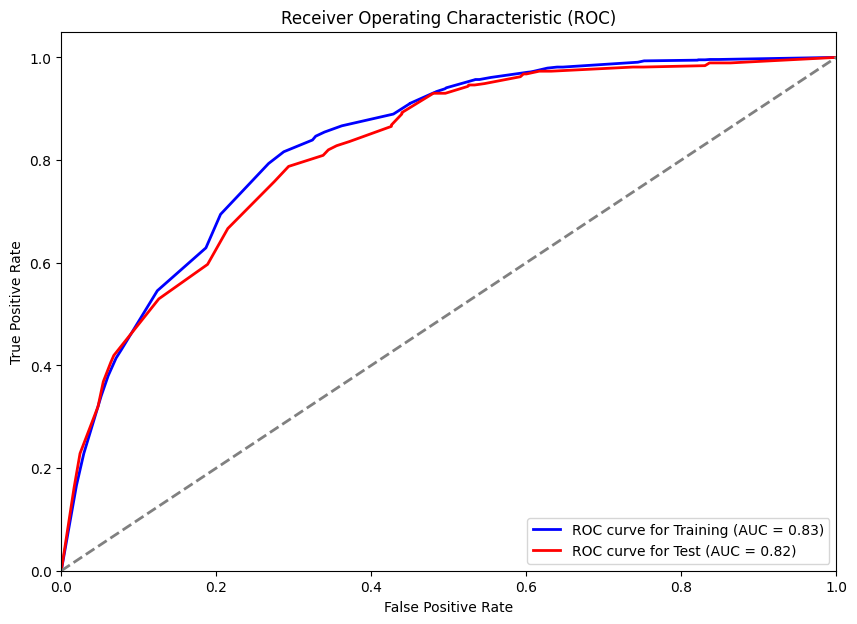

In [83]:
# Menampilkan Kurva ROC AUC Model XGBoost:
y_train_prob = random_search.best_estimator_.predict_proba(X_train)[:,1]
y_test_prob = random_search.best_estimator_.predict_proba(X_test)[:,1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Visualisasi
plt.figure(figsize=(10,7))

# Training daata ROC
plt.plot(fpr_train, tpr_train, color='blue', lw=2, 
         label='ROC curve for Training (AUC = %0.2f)' % roc_auc_train)

# Test data ROC
plt.plot(fpr_test, tpr_test, color='red', lw=2, 
         label='ROC curve for Test (AUC = %0.2f)' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.show()


Kurva ROC: Kurva ROC memplot True Positive Rate (TPR atau Recall) terhadap False Positive Rate (FPR).

<li>Semakin jauh suatu kurva berada di atas garis diagonal berwarna biru, semakin baik. 

<li>Jika dilihat dari AUC diatas nilainya diatas 80%, berarti model ini dapat dikategorikan model pengklasifikasian yang cukup baik

Implikasi di Dunia Nyata:
Memprediksi churn sangat penting bagi bisnis untuk mengambil tindakan pencegahan. Jika perhatian utamanya adalah mengidentifikasi sebanyak mungkin kasus churn (mungkin untuk menargetkan kasus tersebut dengan strategi retensi), maka penarikan kembali yang lebih tinggi untuk kelas 1 diperlukan. Mengingat hasilnya:

XGBoost: Model ini akan mampu mengidentifikasi 79% pelanggan yang cenderung melakukan churn. Namun, di antara pelanggan yang diperkirakan akan melakukan churn, hanya 49% yang benar-benar akan melakukan churn. Ini bisa berarti bahwa strategi retensi mungkin diterapkan pada beberapa pelanggan yang tidak akan melakukan churn sejak awal.
KNN: Model ini mengidentifikasi 71% pelanggan yang cenderung melakukan churn. Di antara prediksinya, 48% akan benar-benar melakukan churn. Jadi, meskipun ia menandai lebih sedikit pelanggan untuk melakukan churn, presisinya hampir mirip dengan XGBoost.
Kesimpulan:
Model XGBoost lebih unggul dalam hal recall, akurasi, dan skor F1 untuk memprediksi churn jika dibandingkan dengan model KNN. Dalam skenario dunia nyata yang prioritasnya adalah memaksimalkan identifikasi kasus churn potensial (bahkan jika itu berarti beberapa pelanggan yang teridentifikasi mungkin tidak benar-benar churn), model XGBoost akan menjadi pilihan yang lebih disukai untuk prediksi churn.

# ix. Model Saving

In [84]:
# Menyimpan Data
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)  

with open('list_cat_cols_ohe.txt', 'w') as file_2:
  json.dump(cat_cols_ohe, file_2)

with open('list_cat_cols_ord.txt', 'w') as file_3:
  json.dump(cat_cols_ord, file_3)

with open('contract_order_for_encoder.txt', 'w') as file_4:
   json.dump(contract_order_for_encoder, file_4)

with open('preprocessor.pkl', 'wb') as file_5:
    pickle.dump(preprocessor, file_5)  

with open('chi_selector.pkl', 'wb') as file_6:
    pickle.dump(chi_selector, file_6)

with open('anova_selector.pkl', 'wb') as file_7:
    pickle.dump(anova_selector, file_7)

with open('model.pkl', 'wb') as file_8:
    pickle.dump(best_pipeline, file_8)

# x. Pengambilan Kesimpulan

Dengan tujuan untuk memprediksi secara akurat kelompok pelanggan (Customer) yang berhenti berlangganan atau tidak lagi membeli produk dari suatu perusahaan (Churn), analisis ini menggunakan data historis terkait profil, preferensi produk, dan transaksi yang terkait dengan customer dari suatu perusahaan telekomunikasi Dalam membangun model prediktif terkait analisis churn, analisis ini membuat model klasifikasi menggunakan Machine learning framework Scikit-Learn dengan menggunakan beberapa model algoritma yang berbeda.     

Model algoritma yang digunakan, diantaranya KNN, SVM, Decision Tree, dan juga model Random Forest, dengan juga mengimplementasikan salah satu algoritma Boosting sebagai landasan dasar analisis. Analisis ini juga mengggunakan cross_validate serta implementasi Hyperparameter Tuning untuk mencari nilai performansi yang paling optimal. Sebelum melakukan evaluasi untuk pembuatan model classification, terlebih dahulu datanya dilakukan pengolahan termasuk handling outlier, missing data, scaling fitur-fitur yang memerlukan penyesuaian skala, serta melakukan feature selection menggunakan uji statistik untuk meminimalisir adanya pengaruh-pengaruh dari komponen yang tidak berelasi terhadap komponen utama atau target, yaitu "Churn".

Pemilihan Model dengan Hyperparameter Tuning terhadap seluruh model (KNN, SVM, Decision Tree, Random Forest, XGBoost) telah dilakukan. Hasil evaluasi model menunjukkan model XGBoost dengan menggunakan RandomSearchCV untuk hyperparameter tuning menjadi pilihan terbaik karena memiliki recall tertinggi untuk kelas 'Churn'. Artinya, model tersebut dapat mengidentifikasi dengan benar lebih banyak kasus churn aktual dibandingkan model lainnya, yang merupakan aspek paling penting untuk analisis ini. Model ini mampu mengidentifikasi 79% pelanggan yang cenderung melakukan churn. Model ini lebih unggul dalam hal recall, akurasi, dan skor F1 dibandingkan seluruh model yang digunakan. Dalam skenario dunia nyata yang prioritasnya adalah memaksimalkan identifikasi kasus churn potensial, model XGBoost akan menjadi pilihan yang paling optimal untuk prediksi churn berdasarkan analisis data ini. Namun, untuk memaksimalkan hasil prediksi, model analis ini dapat dikembangkan dengan lebih banyak improvisasi yang dapat dilakukan. Batasan yang dapat dilakukan improvisasi dari model ini diantaranya, rekayasa fitur atau menambah data yang lebih representatif, seperti jumlah penghasilan perbulan dan sebagainya. Performa model ini juga dapat ditingkatkan dengan menggunakan algoritma lain yang lebih optimal dalam memprediksi kelas recall dan imbalanced data.

# Conceptual Problems

1. Latar belakang adanya bagging dan cara kerja bagging 

Latar belakang:
Model Machine learning, khusunya model non-linier seperti Decision Tree terkadang dapat menghasilkan permodelan yang overfit pada data trining. Artinya, meskipun error yang dihasilkan sangat rendah pada data pelatihan, performanya mungkin tidak terlalu baik pada data yang tidak terlihat. Alasan utamanya adalah tingginya varians yang mungkin dimiliki, sehingga sedikit perubahan pada data pelatihan dapat menghasilkan struktur model yang sangat berbeda. Bagging adalah salah satu metode untuk mengurangi varians ini.

Cara Kerja Bagging:
<li>Bootstrapping: Langkah pertama dalam bagging adalah membuat beberapa dataset dari data pelatihan asli menggunakan bootstrapping. Bootstrapping adalah teknik pengambilan sampel di mana titik data 'n' diambil sampelnya secara acak dengan penggantian dari kumpulan data asli berukuran 'n'. Karena pengambilan sampel dengan penggantian, beberapa titik data mungkin diulangi di setiap kumpulan data baru, sementara titik data lainnya mungkin dihilangkan seluruhnya.

<li>Pembuatan Model: Untuk masing-masing kumpulan data yang di-bootstrap ini, contoh terpisah dari pengklasifikasi dasar (misalnya, Decision Tree) dilatih. Karena setiap kumpulan data pada dasarnya berbeda, maka setiap pengklasifikasi juga akan sedikit berbeda.

<li>Agregasi: Untuk masalah regresi, prediksi akhir dari suatu input tertentu dapat berupa rata-rata dari semua prediksi dari masing-masing pengklasifikasi. Untuk klasifikasi, biasanya yang ditentukan adalah suara mayoritas (yaitu, kelas yang mendapat prediksi paling banyak di semua pengklasifikasi menjadi prediksi akhir).

2. Perbedaan cara kerja algoritma Random Forest dengan algoritma XGBoost     

<li>Random Forest adalah pendekatan berbasis bagging yang membangun beberapa pohon keputusan mendalam secara paralel dan menggabungkan hasilnya melalui pemungutan suara mayoritas atau rata-rata.
<li>XGBoost adalah pendekatan berbasis peningkatan yang membangun pohon keputusan secara berurutan, dengan setiap pohon mencoba memperbaiki kesalahan pendahulunya. Ini menyertakan istilah regularisasi dalam tujuan pengoptimalannya, sehingga lebih baik dalam permasalahan overfitting.


3. Maksud dari Cross Validation       

Cross Validation (CV) adalah teknik statistik yang digunakan untuk mengevaluasi kinerja pembelajaran Machine Learning atau model statistik pada data yang tidak terlihat. Tujuan utamanya adalah untuk menilai bagaimana hasil suatu model akan digeneralisasikan ke kumpulan data independen. Singkatnya, Cross Validation adalah teknik penting untuk memperkirakan performa model pada data yang tidak terlihat dan mengurangi overfitting. Ini memberikan hasl yang lebih akurat daripada pemisahan pelatihan atau pengujian data sederhana dengan mengevaluasi model berulang kali pada subkumpulan data yang berbeda.

In [85]:
from xgboost import plot_importance

In [96]:
best_xgb_model = best_pipeline.named_steps['classifier']
X_transformed = best_pipeline.named_steps['features'].transform(X_train)

In [97]:
# Get feature names from one hot encoder
ohe_feature_names = best_pipeline.named_steps['features'].named_steps['preprocess'].named_transformers_['cat_ohe'].get_feature_names_out(cat_cols_ohe)

# For ordinal encoder and min max scaler, you can use the original column names
# because the number of columns remains the same
transformed_feature_names = np.concatenate([num_cols, ohe_feature_names, cat_cols_ord])


In [98]:
# Get feature indices selected by chi2
chi_selected_indices = best_pipeline.named_steps['features'].named_steps['feature_select'].transformer_list[0][1].get_support(indices=True)
chi_selected_names = transformed_feature_names[chi_selected_indices]

# Get feature indices selected by anova
anova_selected_indices = best_pipeline.named_steps['features'].named_steps['feature_select'].transformer_list[1][1].get_support(indices=True)
anova_selected_names = transformed_feature_names[anova_selected_indices]

# Combine both
selected_names = np.concatenate([chi_selected_names, anova_selected_names])


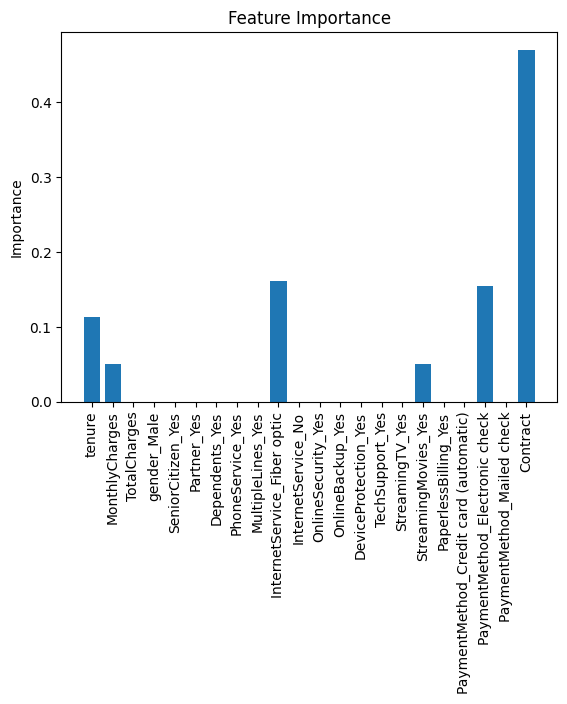

In [99]:
feature_importance = best_xgb_model.feature_importances_

plt.bar(selected_names, feature_importance)
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [100]:
feature_importance

array([0.11339059, 0.05055427, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1610628 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05005717, 0.        , 0.        , 0.15462326,
       0.        , 0.47031188, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

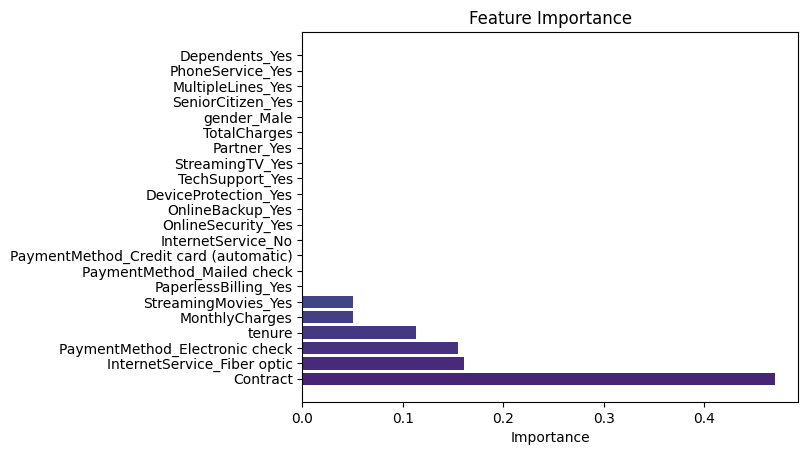

In [108]:
# Sort the features based on importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_names = np.array(selected_names)[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Use a colormap to color the bars
colors = plt.cm.viridis(np.linspace(0.1, 1, len(sorted_importance)))

plt.barh(sorted_names, sorted_importance, color=colors)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


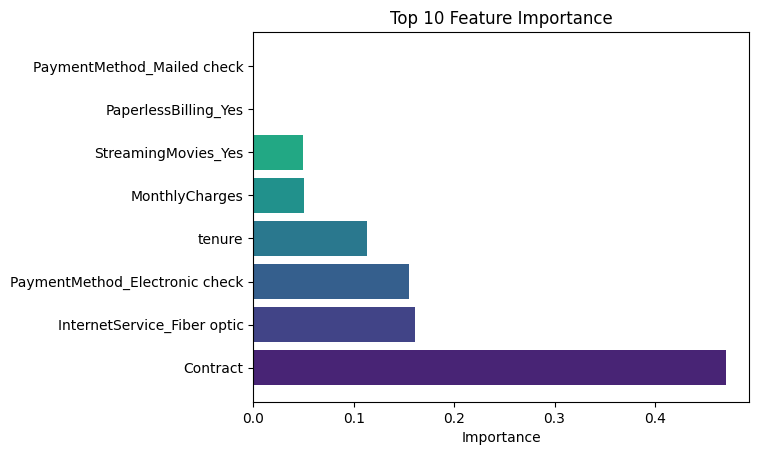

In [114]:
# Sort the features based on importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_names = np.array(selected_names)[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Slice arrays to keep only the top 10 features
top_n = 10
top_names = sorted_names[:top_n]
top_importance = sorted_importance[:top_n]

# Use a colormap to color the bars
colors = plt.cm.viridis(np.linspace(0.1, 1, top_n))

plt.barh(top_names, top_importance, color=colors)
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()
